##**Spatio-Temporal Prediction of Anti-Social Behaviour in London using Machine Learning and DEEP LEARNING**

## 1.DATASET LOADING

Connecting Drive to load dataset

---



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
#COMBINED CSV FILE OF 05-2022-2024-12 city-of-london-street,British Transport Police,METROPOLITAN
file_path = "/content/drive/MyDrive/final work/Research project/combined_data.csv"#COMBINED CSV FILE OF 2022-2024
combined_df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(f"Total records: {len(combined_df)}")

Data loaded successfully!
Total records: 3159114


In [ ]:
#Unzipping Shape file of UK Boundaries
!unzip "/content/drive/MyDrive/final work/Research project/Counties_and_Unitary_Authorities_December_2024_Boundaries_UK_BFC_8680832993435094885.zip" -d "/content/Boundaries"


Archive:  /content/drive/MyDrive/final work/Research project/Counties_and_Unitary_Authorities_December_2024_Boundaries_UK_BFC_8680832993435094885.zip
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.cpg  
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.dbf  
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.prj  
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.shp  
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.shp.xml  
  inflating: /content/Boundaries/CTYUA_DEC_2024_UK_BFC.shx  


In [ ]:
#Unzipping POI's File
!unzip "/content/drive/MyDrive/final work/Research project/greater-london-latest-free.shp.zip" -d "/content/poi"

Archive:  /content/drive/MyDrive/final work/Research project/greater-london-latest-free.shp.zip
  inflating: /content/poi/README     
 extracting: /content/poi/gis_osm_buildings_a_free_1.cpg  
  inflating: /content/poi/gis_osm_buildings_a_free_1.dbf  
  inflating: /content/poi/gis_osm_buildings_a_free_1.prj  
  inflating: /content/poi/gis_osm_buildings_a_free_1.shp  
  inflating: /content/poi/gis_osm_buildings_a_free_1.shx  
 extracting: /content/poi/gis_osm_landuse_a_free_1.cpg  
  inflating: /content/poi/gis_osm_landuse_a_free_1.dbf  
  inflating: /content/poi/gis_osm_landuse_a_free_1.prj  
  inflating: /content/poi/gis_osm_landuse_a_free_1.shp  
  inflating: /content/poi/gis_osm_landuse_a_free_1.shx  
 extracting: /content/poi/gis_osm_natural_a_free_1.cpg  
  inflating: /content/poi/gis_osm_natural_a_free_1.dbf  
  inflating: /content/poi/gis_osm_natural_a_free_1.prj  
  inflating: /content/poi/gis_osm_natural_a_free_1.shp  
  inflating: /content/poi/gis_osm_natural_a_free_1.shx  
 

##  DATA-PROCESSING





 DATA CLEANING

In [ ]:
combined_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,ed18a10886a5a4c6180ae489844993780da0f3090247ed...,2023-04,City of London Police,City of London Police,-0.110350,51.518090,On or near Holborn,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN
1,41f5b4e5c183ea17cc6c92fecbd2f408094104d0d0dc0e...,2023-04,City of London Police,City of London Police,-0.110350,51.518090,On or near Holborn,E01000917,Camden 027C,Other theft,Status update unavailable,NaN
2,b8e577f2767ed58fe027b3f7e2eeaf87967f37abebda90...,2023-04,City of London Police,City of London Police,-0.110350,51.518090,On or near Holborn,E01000917,Camden 027C,Theft from the person,Investigation complete; no suspect identified,NaN
3,5ece48a6c6409204eba132c467a02b99b1019996ddb1d4...,2023-04,City of London Police,City of London Police,-0.113212,51.516841,On or near Old Square,E01000914,Camden 028B,Other theft,Status update unavailable,NaN
4,e5814f87f0e781a7fca295567d90059383ad5842306049...,2023-04,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3159109,NaN,2024-01,British Transport Police,British Transport Police,-4.258257,55.859590,On or near Glasgow Central (Station),NaN,NaN,Other crime,NaN,NaN
3159110,NaN,2024-01,British Transport Police,British Transport Police,-4.224493,57.478736,On or near Inverness (Station),NaN,NaN,Other crime,NaN,NaN
3159111,NaN,2024-01,British Transport Police,British Transport Police,-4.173903,55.887407,On or near Robroyston (Station),NaN,NaN,Other crime,NaN,NaN
3159112,NaN,2024-01,British Transport Police,British Transport Police,-3.848843,55.731229,On or near Carluke (Station),NaN,NaN,Other crime,NaN,NaN


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159114 entries, 0 to 3159113
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 289.2+ MB


In [ ]:
combined_df.shape

(3159114, 12)

In [ ]:
combined_df.isnull().sum()

,0
Crime ID,736563
Month,0
Reported by,0
Falls within,0
Longitude,44444
Latitude,44444
Location,0
LSOA code,48404
LSOA name,48404
Crime type,0


In [ ]:
combined_df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [ ]:
#  i am keeping only essential columns
columns_to_keep = ['Month', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type']
columns_to_drop = [col for col in combined_df.columns if col not in columns_to_keep]
combined_df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
#   Removing  rows with missing coordinates
combined_df.dropna(subset=['Longitude', 'Latitude'], inplace=True)


In [ ]:

print(f"Available crime types: {combined_df['Crime type'].unique()}")
print(f"Records after cleaning: {len(combined_df)}")


Available crime types: ['Other theft' 'Theft from the person' 'Bicycle theft' 'Burglary'
 'Criminal damage and arson' 'Vehicle crime'
 'Violence and sexual offences' 'Public order' 'Anti-social behaviour'
 'Drugs' 'Shoplifting' 'Other crime' 'Possession of weapons' 'Robbery']
Records after cleaning: 3114670


DEFINE LONDON BOROGHS

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Loading the uk boundary map
uk_boundaries = gpd.read_file("/content/Boundaries/CTYUA_DEC_2024_UK_BFC.shp")

# A list of London boroughs (plus City of London)
# I   pulled these names feom the latest official list
london_names = [
    "City of London", "Barking and Dagenham", "Barnet", "Bexley", "Brent",
    "Bromley", "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney",
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering", "Hillingdon",
    "Hounslow", "Islington", "Kensington and Chelsea", "Kingston upon Thames",
    "Lambeth", "Lewisham", "Merton", "Newham", "Redbridge", "Richmond upon Thames",
    "Southwark", "Sutton", "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]

# filtering for the  the London boundaries
gdf_london = uk_boundaries[uk_boundaries["CTYUA24NM"].isin(london_names)].copy()

# assigning to British National Grid (EPSG:27700) for better area calculations
gdf_london = gdf_london.to_crs(epsg=27700)

In [ ]:
# Dissolve the London local authority boundaries to one whole London boundary.
greater_london = gdf_london.dissolve()

In [ ]:
gdf_london

,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
99,E09000001,City of London,None,532382,181358,-0.093520,51.5156,32e7e6d5-e9e9-447b-9ae6-e85497b0b7db,"MULTIPOLYGON (((531664.45 180555.15, 531664.3 ..."
100,E09000002,Barking and Dagenham,None,547757,185111,0.129479,51.5456,c6576932-acd8-4fb9-8ea5-188bd65be181,"MULTIPOLYGON (((543581.8 184798.25, 543579.25 ..."
101,E09000003,Barnet,None,523473,191752,-0.218200,51.6111,d2683086-c7f5-4d3b-a084-70acd57f28c0,"POLYGON ((524579.897 198355.201, 524594.301 19..."
102,E09000004,Bexley,None,549202,175434,0.146212,51.4582,3ef326a7-60e5-4a4b-8f8b-ba0f10b1ec74,"MULTIPOLYGON (((552869.5 175530.8, 552862.45 1..."
103,E09000005,Brent,None,519615,186465,-0.275690,51.5644,be42cd13-9298-4dbf-b896-21efaef59032,"POLYGON ((520278.817 190250.43, 520287.009 190..."
104,E09000006,Bromley,None,542036,165707,0.039246,51.3727,00d073c8-2e77-4a5b-be75-3f94cd6f71a4,"POLYGON ((541212.745 173658.571, 541215.746 17..."
105,E09000007,Camden,None,527491,184283,-0.162910,51.5430,e8a26948-bbf8-4244-9987-f2d44f32b5a5,"POLYGON ((527195.051 187578.405, 527201.395 18..."
106,E09000008,Croydon,None,533922,164745,-0.077620,51.3660,8d67e452-48d2-4b04-87f3-3e19021197f5,"POLYGON ((531409.308 171042.621, 531439.333 17..."
107,E09000009,Ealing,None,517055,181959,-0.314100,51.5244,65d66335-14fa-483b-bfdd-d03255c0477e,"POLYGON ((514789.398 185691.251, 514790.691 18..."
108,E09000010,Enfield,None,532831,196198,-0.081440,51.6489,75b9d640-758e-4332-ad2e-478dffb5064c,"POLYGON ((531024.595 200933.623, 531026.32 200..."


In [ ]:
greater_london

,geometry,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID
0,"MULTIPOLYGON (((522222.9 166018, 522214.4 1660...",E09000001,City of London,None,532382,181358,-0.09352,51.5156,32e7e6d5-e9e9-447b-9ae6-e85497b0b7db


In [ ]:
# checking the coordinate reference system (CRS) of the London local authority boundaries.
gdf_london.crs


<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
from shapely.geometry import Polygon #creating and manipulate geometric shapes(squares).
import numpy as np
# creating the 1 km × 1 km grid over the boundary of Greater London
xmin, ymin, xmax, ymax = greater_london.total_bounds
grid_size = 1000  # metres

polygons = []
grid_ids  = []
gid = 0

for x in np.arange(xmin, xmax, grid_size):
    for y in np.arange(ymin, ymax, grid_size):
        square = Polygon([
            (x,          y),
            (x + grid_size, y),
            (x + grid_size, y + grid_size),
            (x,          y + grid_size)
        ])
        polygons.append(square)
        grid_ids.append(gid)
        gid += 1

#  building a geodatframe of all grid cells
grid = gpd.GeoDataFrame(
    {"grid_id": grid_ids, "geometry": polygons},
    crs=greater_london.crs #coordinate refrence system inheriretd for matching
)

# filtering for only those cell interest london boundaries
london_grid = gpd.sjoin(
    grid,
    greater_london[["geometry"]],
    how="inner",
    predicate="intersects" # matches grid cells with london boundary  where they intersect.
).drop(columns=["index_right"]) \
 .drop_duplicates("grid_id")# a bit of data cleaning
print(f"Total grid cells over Greater London: {len(london_grid)}")


Total grid cells over Greater London: 1736


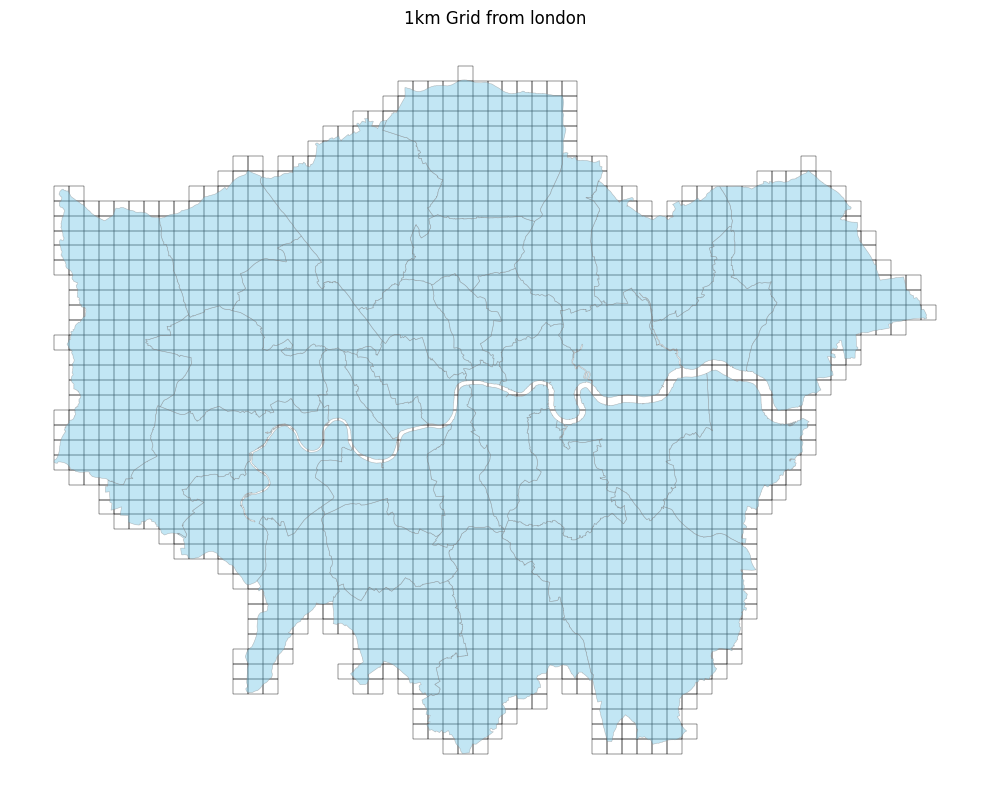

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# Ploting 1km grid cells
london_grid.plot(
    ax=ax,
    edgecolor='black',
    facecolor='none',
    linewidth=0.3
)
# here i am ploting london polygons
gdf_london.plot(
    ax=ax,
    edgecolor='grey',
    color='skyblue',
    alpha=0.5,
    linewidth=0.4
)

plt.title("1km Grid from london")
plt.axis("off")
plt.tight_layout()
plt.show()


#ADDING POINT OF INTREST

In [ ]:
# here i am using  the the gis_osm_pois_free_1.shp file
poi_gdf = gpd.read_file("/content/poi/gis_osm_pois_free_1.shp")
poi_gdf.columns

Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')

In [ ]:
# assing POIs to match the  grid CRS
gdf_poi = poi_gdf.to_crs(london_grid.crs)


<Axes: >

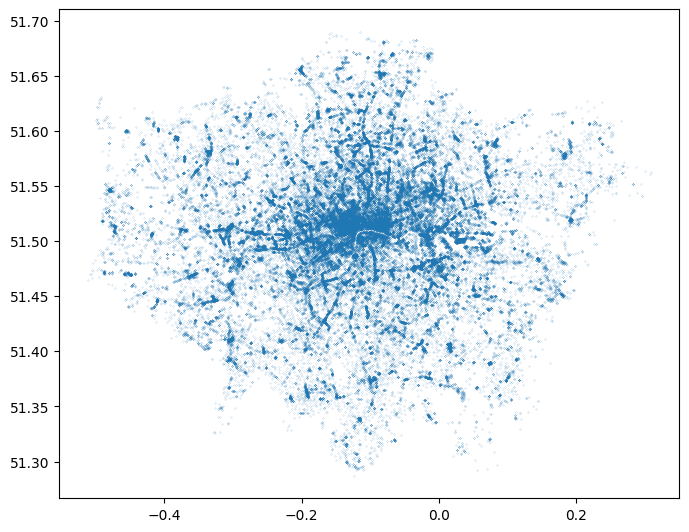

In [ ]:
poi_gdf.plot(markersize=0.01, figsize=(8,12))

In [ ]:
gdf_poi_grid = gpd.sjoin(
    gdf_poi,
    london_grid[['grid_id','geometry']],
    how='inner',
    predicate='intersects'
).drop(columns='index_right')

print("Matched POIs:", len(gdf_poi_grid))
print("Grids with ≥1 POI:", gdf_poi_grid['grid_id'].nunique())


Matched POIs: 95525
Grids with ≥1 POI: 1585


In [ ]:
# Count POIs per grid
poi_counts = (
    gdf_poi_grid
    .groupby('grid_id')
    .size()
    .reset_index(name='poi_counts')
)

# just for checking how many point of areas intersects in that grid
poi_types = (
    gdf_poi_grid
    .groupby('grid_id')['fclass']
    .nunique()
    .reset_index(name='poi_types')
)

# directly mefrging into the london grid as i created before
london_grid = london_grid.merge(poi_counts, on='grid_id', how='left')
london_grid = london_grid.merge(poi_types, on='grid_id', how='left')

# a bit of data cleaning
london_grid[['poi_counts', 'poi_types']] = london_grid[['poi_counts', 'poi_types']].fillna(0)

print(london_grid.head())


   grid_id                                           geometry  poi_counts  \
0       19  POLYGON ((503571.5 174854.3, 504571.5 174854.3...         3.0   
1       20  POLYGON ((503571.5 175854.3, 504571.5 175854.3...         4.0   
2       21  POLYGON ((503571.5 176854.3, 504571.5 176854.3...         2.0   
3       22  POLYGON ((503571.5 177854.3, 504571.5 177854.3...         0.0   
4       27  POLYGON ((503571.5 182854.3, 504571.5 182854.3...         1.0   

   poi_types  
0        3.0  
1        1.0  
2        1.0  
3        0.0  
4        1.0  


In [ ]:
#while running it again i accidently merged some unnuceary columns so ijust removing it nothing at all
london_grid = london_grid.loc[:, ~london_grid.columns.str.endswith(('_x', '_y'))]


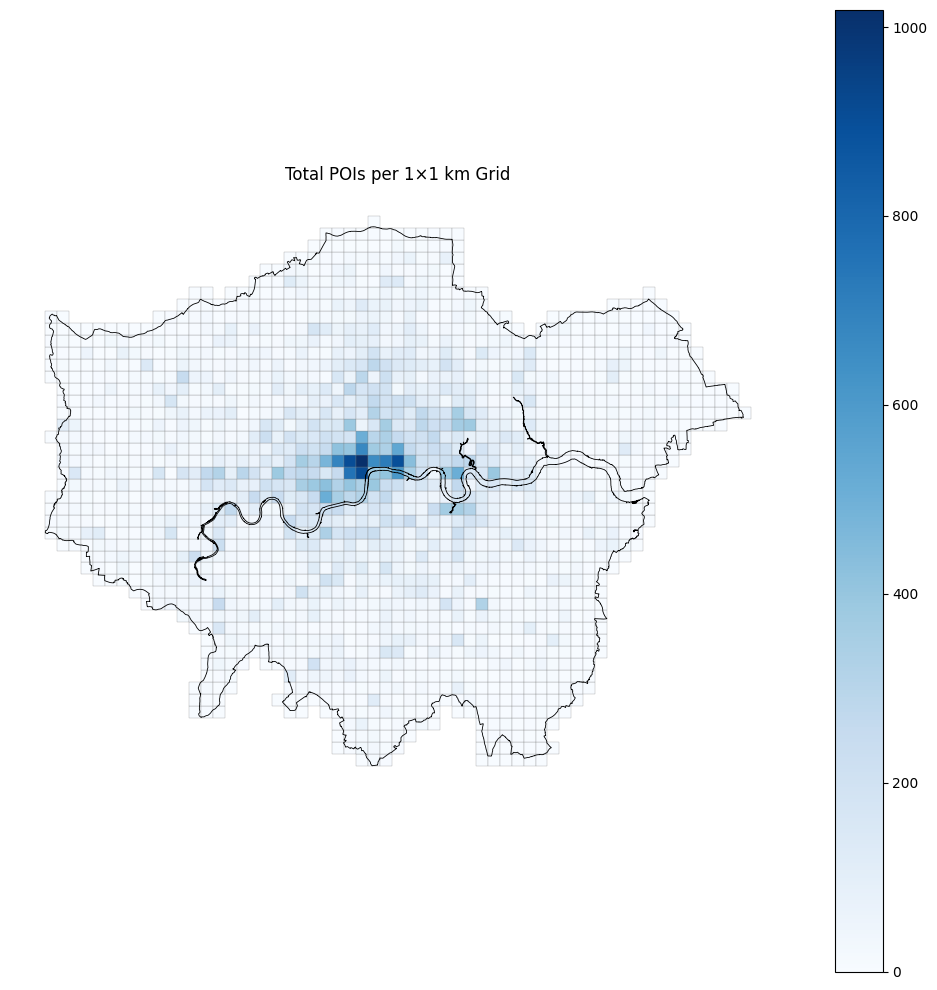

In [ ]:
#PLOTING LONDON GRID WITH
fig, ax = plt.subplots(figsize=(10,10))
london_grid.plot(column='poi_counts', cmap='Blues', legend=True, edgecolor='grey', linewidth=0.2, ax=ax)
greater_london.boundary.plot(ax=ax, color='black', linewidth=0.6)
ax.set_title("Total POIs per 1×1 km Grid")
ax.axis('off'); plt.tight_layout(); plt.show()


Filtering for Anti-Social Behaviour Crimes



In [ ]:
# Filter for Anti-social behaviour crimes only
asb_df = combined_df[combined_df['Crime type'] == 'Anti-social behaviour'].copy()
asb_df['Month'] = pd.to_datetime(asb_df['Month'])#convert month to date time
print(f"Anti-social behaviour records: {len(asb_df)}")


Anti-social behaviour records: 625032


In [ ]:
asb_df

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
47,2023-04-01,-0.094017,51.520901,On or near,E01000003,City of London 001C,Anti-social behaviour
55,2023-04-01,-0.077511,51.515812,On or near Artizan Street,E01000005,City of London 001E,Anti-social behaviour
56,2023-04-01,-0.077511,51.515812,On or near Artizan Street,E01000005,City of London 001E,Anti-social behaviour
57,2023-04-01,-0.075080,51.512625,On or near St Clare Street,E01000005,City of London 001E,Anti-social behaviour
58,2023-04-01,-0.074925,51.514924,On or near St Botolph Street,E01000005,City of London 001E,Anti-social behaviour
...,...,...,...,...,...,...,...
3155053,2024-01-01,-0.133480,51.486807,On or near St George'S Square Mews,E01035722,Westminster 024G,Anti-social behaviour
3155054,2024-01-01,-0.137230,51.486309,On or near Parking Area,E01035722,Westminster 024G,Anti-social behaviour
3155055,2024-01-01,-0.136284,51.485152,On or near Petrol Station,E01035722,Westminster 024G,Anti-social behaviour
3155056,2024-01-01,-0.133480,51.486807,On or near St George'S Square Mews,E01035722,Westminster 024G,Anti-social behaviour


In [ ]:
#just simply keeping same crs
asb_gdf = gpd.GeoDataFrame(
    asb_df,
    geometry=gpd.points_from_xy(asb_df['Longitude'], asb_df['Latitude']),
    crs="EPSG:4326"
).to_crs(london_grid.crs)


In [ ]:
asb_gdf

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,geometry
47,2023-04-01,-0.094017,51.520901,On or near,E01000003,City of London 001C,Anti-social behaviour,POINT (532334.018 181941.958)
55,2023-04-01,-0.077511,51.515812,On or near Artizan Street,E01000005,City of London 001E,Anti-social behaviour,POINT (533493.978 181406.003)
56,2023-04-01,-0.077511,51.515812,On or near Artizan Street,E01000005,City of London 001E,Anti-social behaviour,POINT (533493.978 181406.003)
57,2023-04-01,-0.075080,51.512625,On or near St Clare Street,E01000005,City of London 001E,Anti-social behaviour,POINT (533671.968 181056.033)
58,2023-04-01,-0.074925,51.514924,On or near St Botolph Street,E01000005,City of London 001E,Anti-social behaviour,POINT (533675.998 181311.972)
...,...,...,...,...,...,...,...,...
3155053,2024-01-01,-0.133480,51.486807,On or near St George'S Square Mews,E01035722,Westminster 024G,Anti-social behaviour,POINT (529692.975 178080.017)
3155054,2024-01-01,-0.137230,51.486309,On or near Parking Area,E01035722,Westminster 024G,Anti-social behaviour,POINT (529434.035 178018.006)
3155055,2024-01-01,-0.136284,51.485152,On or near Petrol Station,E01035722,Westminster 024G,Anti-social behaviour,POINT (529502.988 177891.016)
3155056,2024-01-01,-0.133480,51.486807,On or near St George'S Square Mews,E01035722,Westminster 024G,Anti-social behaviour,POINT (529692.975 178080.017)


In [ ]:
asb_with_grid = gpd.sjoin(
    asb_gdf,
    london_grid[['grid_id','geometry']],
    how='inner',# keeping only the points that intersecting atleast one grid cell
    predicate='intersects'#crime point  inside or touching the grid cell.
).drop(columns='index_right')# i already have grid id so i dont need the index right


In [ ]:
#. Grouping and counting the anti social behaviour crimes.
asb_counts = (
    asb_with_grid
    .groupby(['grid_id', asb_with_grid['Month'].dt.to_period('M')])
    .size()
    .reset_index(name='asb_count')
)

# # reshaping the asb_counts to have a column for each month
asb_crime_pivot = asb_counts.pivot(index='grid_id', columns='Month', values='asb_count').fillna(0)
asb_crime_pivot['crime_counts'] = asb_crime_pivot.sum(axis=1)


In [ ]:
#Generating the full month range
import pandas as pd
all_months = pd.period_range(asb_counts['Month'].min(), asb_counts['Month'].max(), freq='M')
asb_crime_pivot = asb_crime_pivot.reindex(columns=all_months, fill_value=0)
asb_crime_pivot['crime_counts'] = asb_crime_pivot.sum(axis=1)


In [ ]:
asb_crime_pivot

,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,...,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,crime_counts
grid_id,,,,,,,,,,,,,,,,,,,,,
19,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
20,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0
34,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0
35,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
37,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,...,7.0,7.0,5.0,2.0,3.0,0.0,0.0,0.0,1.0,48.0
2518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0


<Axes: >

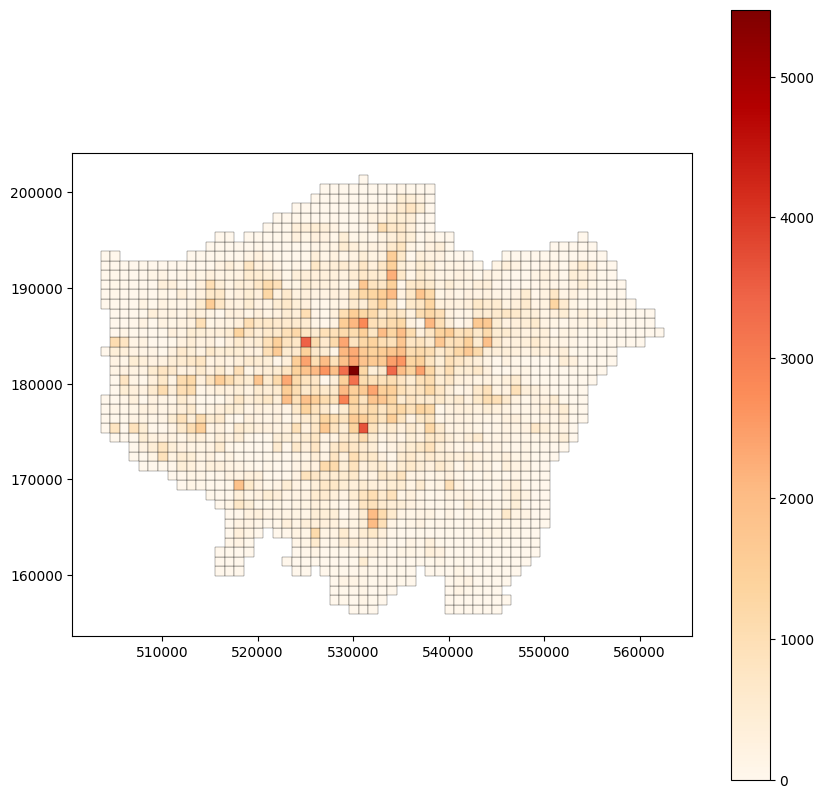

In [ ]:
plot_grid = london_grid.merge(asb_crime_pivot['crime_counts'], on='grid_id', how='left').fillna({'crime_counts':0})
plot_grid.plot(column='crime_counts', cmap='OrRd', edgecolor='black', linewidth=0.2, legend=True, figsize=(10,10))


In [ ]:
import pandas as pd
import geopandas as gpd
grid_for_merge = (
    london_grid
    .reset_index()                               # bringing grid_id out of the index
    [['grid_id', 'poi_counts', 'geometry']]
    .drop_duplicates('grid_id')#dropping the dupplicates
)
grid_for_merge['grid_id'] = grid_for_merge['grid_id'].astype(int)

crime_pivot_for_merge = asb_crime_pivot.copy()
crime_pivot_for_merge.index = crime_pivot_for_merge.index.astype(int)#c the pivot’s index (grid_id) is int.
crime_pivot_for_merge = crime_pivot_for_merge.reset_index()  # grid_id becomes a column

# Merging the  statical features and the time series
final_df = grid_for_merge.merge(
    crime_pivot_for_merge,
    on='grid_id',
    how='left',
    validate='one_to_one'
)

# filling the missing crime values by zero asusaul a bit of data cleaning
crime_cols = [c for c in final_df.columns if c != 'geometry' and c not in ['grid_id','poi_counts']]
final_df[crime_cols] = final_df[crime_cols].fillna(0)


#just checking the geospatial data frame is with right crs
final_df = gpd.GeoDataFrame(final_df, geometry='geometry', crs=london_grid.crs)

#nothing just moving the months before the crime counts and then geomentry
month_cols = [c for c in final_df.columns if isinstance(c, pd.Period)]

ordered_cols = ['grid_id', 'poi_counts'] + month_cols + ['crime_counts', 'geometry']
# keep only those that exist (in case month_cols is empty)
#Detects Period-typed month columns and places them in good order.
ordered_cols = [c for c in ordered_cols if c in final_df.columns]
final_df = final_df[ordered_cols]

print(final_df.head())
print(final_df.shape)


   grid_id  poi_counts  2022-05  2022-06  2022-07  2022-08  2022-09  2022-10  \
0       19         3.0      0.0      0.0      1.0      0.0      1.0      0.0   
1       20         4.0      0.0      1.0      0.0      0.0      0.0      0.0   
2       21         2.0      0.0      0.0      0.0      0.0      0.0      0.0   
3       22         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4       27         1.0      0.0      0.0      0.0      0.0      0.0      0.0   

   2022-11  2022-12  ...  2024-05  2024-06  2024-07  2024-08  2024-09  \
0      0.0      0.0  ...      1.0      0.0      0.0      0.0      0.0   
1      1.0      1.0  ...      0.0      0.0      0.0      1.0      0.0   
2      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   

   2024-10  2024-11  2024-12  crime_counts  \
0      0.0      0.0      0.0      

In [ ]:
final_df

,grid_id,poi_counts,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,...,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,crime_counts,geometry
0,19,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3..."
1,20,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,"POLYGON ((503571.5 175854.3, 504571.5 175854.3..."
2,21,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 176854.3, 504571.5 176854.3..."
3,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 177854.3, 504571.5 177854.3..."
4,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 182854.3, 504571.5 182854.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2607,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((559571.5 186854.3, 560571.5 186854.3..."
1732,2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 184854.3, 561571.5 184854.3..."
1733,2652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 185854.3, 561571.5 185854.3..."
1734,2653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 186854.3, 561571.5 186854.3..."


SPATIAL LAG FOR CRIME COUNTS

In [ ]:
!pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import libpysal
import numpy as np

# buildng a spatial weights(who is neighbour of whom)
w = libpysal.weights.Queen.from_dataframe(final_df)
w.transform = 'r'  # Row-standardize

# computing the spatial lag of crime counts
crime_counts_array = final_df['crime_counts'].to_numpy()
final_df['crime_counts_lag'] = libpysal.weights.spatial_lag.lag_spatial(w, crime_counts_array)

final_df[['grid_id', 'crime_counts', 'crime_counts_lag']].head()


/tmp/ipython-input-895439334.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(final_df)


,grid_id,crime_counts,crime_counts_lag
0,19,3.0,214.5
1,20,12.0,185.2
2,21,0.0,28.6
3,22,0.0,32.0
4,27,0.0,543.0


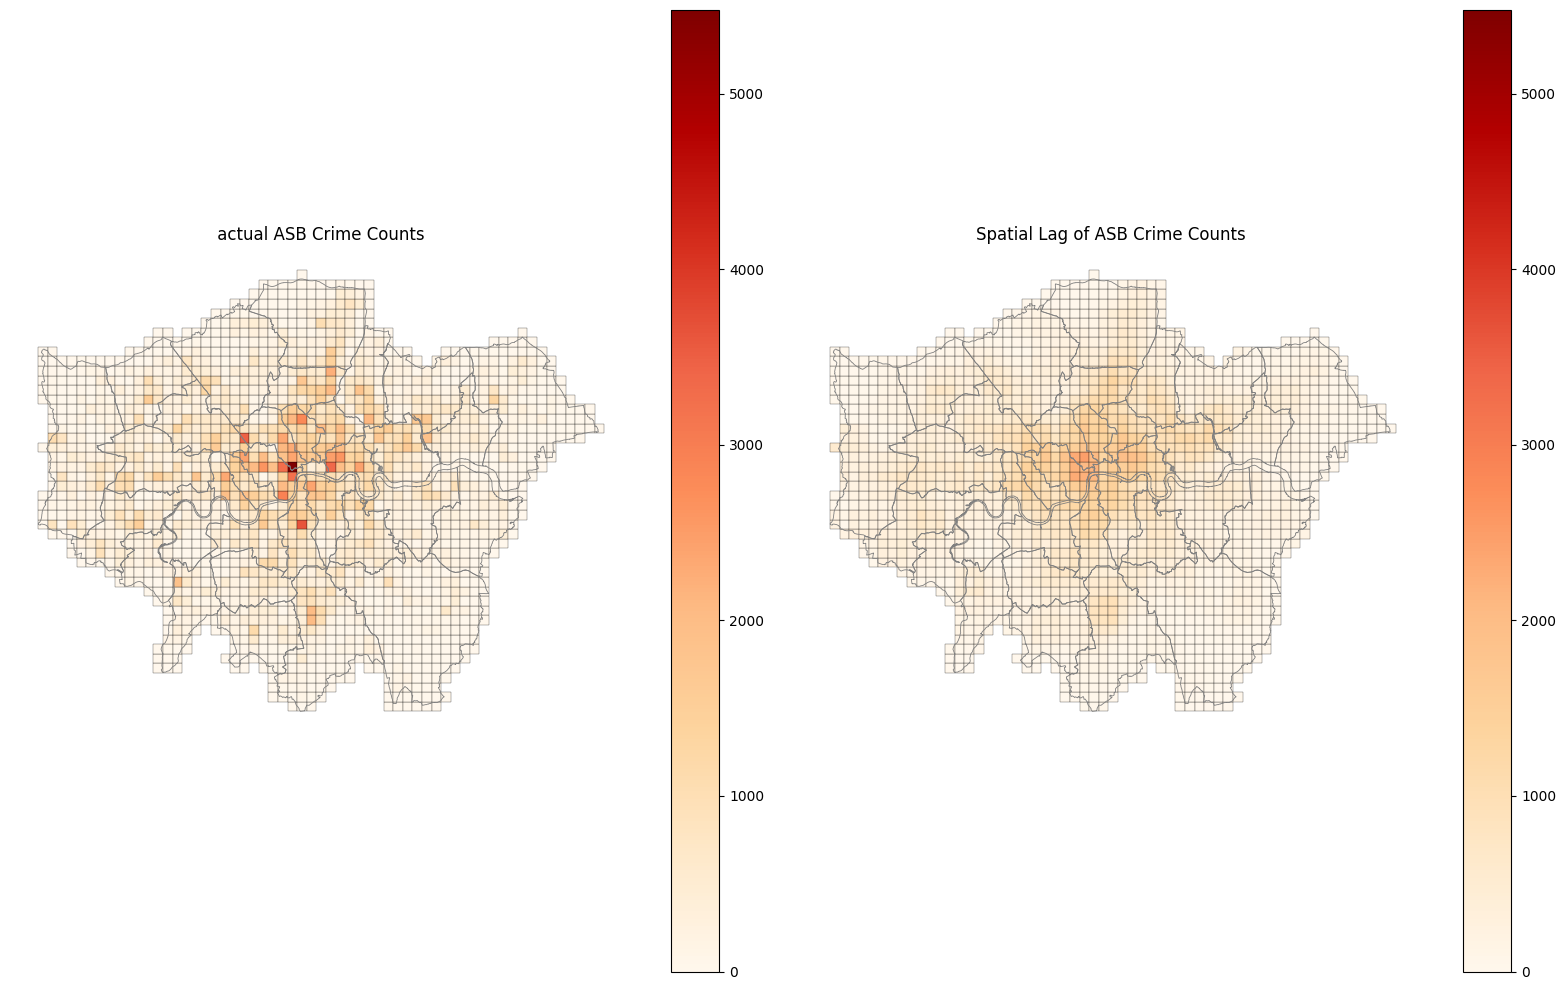

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#shared color range of colors for both maps

vmin = min(final_df['crime_counts'].min(), final_df['crime_counts_lag'].min())
vmax = max(final_df['crime_counts'].max(), final_df['crime_counts_lag'].max())

fig, axes = plt.subplots(1, 2, figsize=(16, 10))#Left is actual counts and Right is the spatial lag

# 1) Actual ASB counts
final_df.plot(
    column='crime_counts',
    cmap='OrRd',
    edgecolor='black',
    linewidth=0.2,
    legend=True,
    vmin=vmin, vmax=vmax,
    ax=axes[0]
)
axes[0].set_title(' actual ASB Crime Counts ')
axes[0].axis('off')

# 2) Spatial lag (neighbors’ average)
final_df.plot(
    column='crime_counts_lag',
    cmap='OrRd',
    edgecolor='black',
    linewidth=0.2,
    legend=True,
    vmin=vmin, vmax=vmax,
    ax=axes[1]
)
axes[1].set_title('Spatial Lag of ASB Crime Counts ')
axes[1].axis('off')
#overlaying borogh boundaries
try:
    gdf_london.boundary.plot(ax=axes[0], color='gray', linewidth=0.6)
    gdf_london.boundary.plot(ax=axes[1], color='gray', linewidth=0.6)
except Exception:
    pass

plt.tight_layout()
plt.show()


##spatial lag model slm

In [ ]:
!pip install spreg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
import libpysal
from spreg import ML_Lag
import numpy as np

# data setup
final_df = final_df.fillna({'crime_counts': 0, 'poi_counts': 0})# taking care of the null values

y = final_df['crime_counts'].values.reshape(-1, 1)# dependent variable y
X = final_df[['poi_counts']].values#independent variables (spreg adds it automatically)

# spatial weight
w = libpysal.weights.Queen.from_dataframe(final_df)
w.transform = 'r'  # row-standardize

# Runing the SLM
slm = ML_Lag(y, X, w=w, name_y='crime_counts', name_x=['poi_counts'], name_w='queen', name_ds='final_df')
print(slm.summary)


/tmp/ipython-input-4031396622.py:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(final_df)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :    final_df
Weights matrix      :       queen
Dependent Variable  :crime_counts                Number of Observations:        1736
Mean dependent var  :    360.0086                Number of Variables   :           3
S.D. dependent var  :    495.0277                Degrees of Freedom    :        1733
Pseudo R-squared    :      0.6503
Spatial Pseudo R-squared:  0.5339
Log likelihood      : -12371.3785
Sigma-square ML     :  85852.4173                Akaike info criterion :   24748.757
S.E of regression   :    293.0058                Schwarz criterion     :   24765.135

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [ ]:
from esda.moran import Moran
m_res = Moran(slm.u, w)
print("Residual Moran's I:", m_res.I, "p-value:", m_res.p_sim)


Residual Moran's I: 0.03914649309515043 p-value: 0.001


In [ ]:
pred_series  = pd.Series(slm.predy.ravel(), index=final_df.index, name='slm_pred')
resid_series = pd.Series(slm.u.ravel(),     index=final_df.index, name='resid_slm')


In [ ]:
# Attach predictions & residuals to final_df
final_df['slm_pred']  = pred_series
final_df['resid_slm'] = resid_series


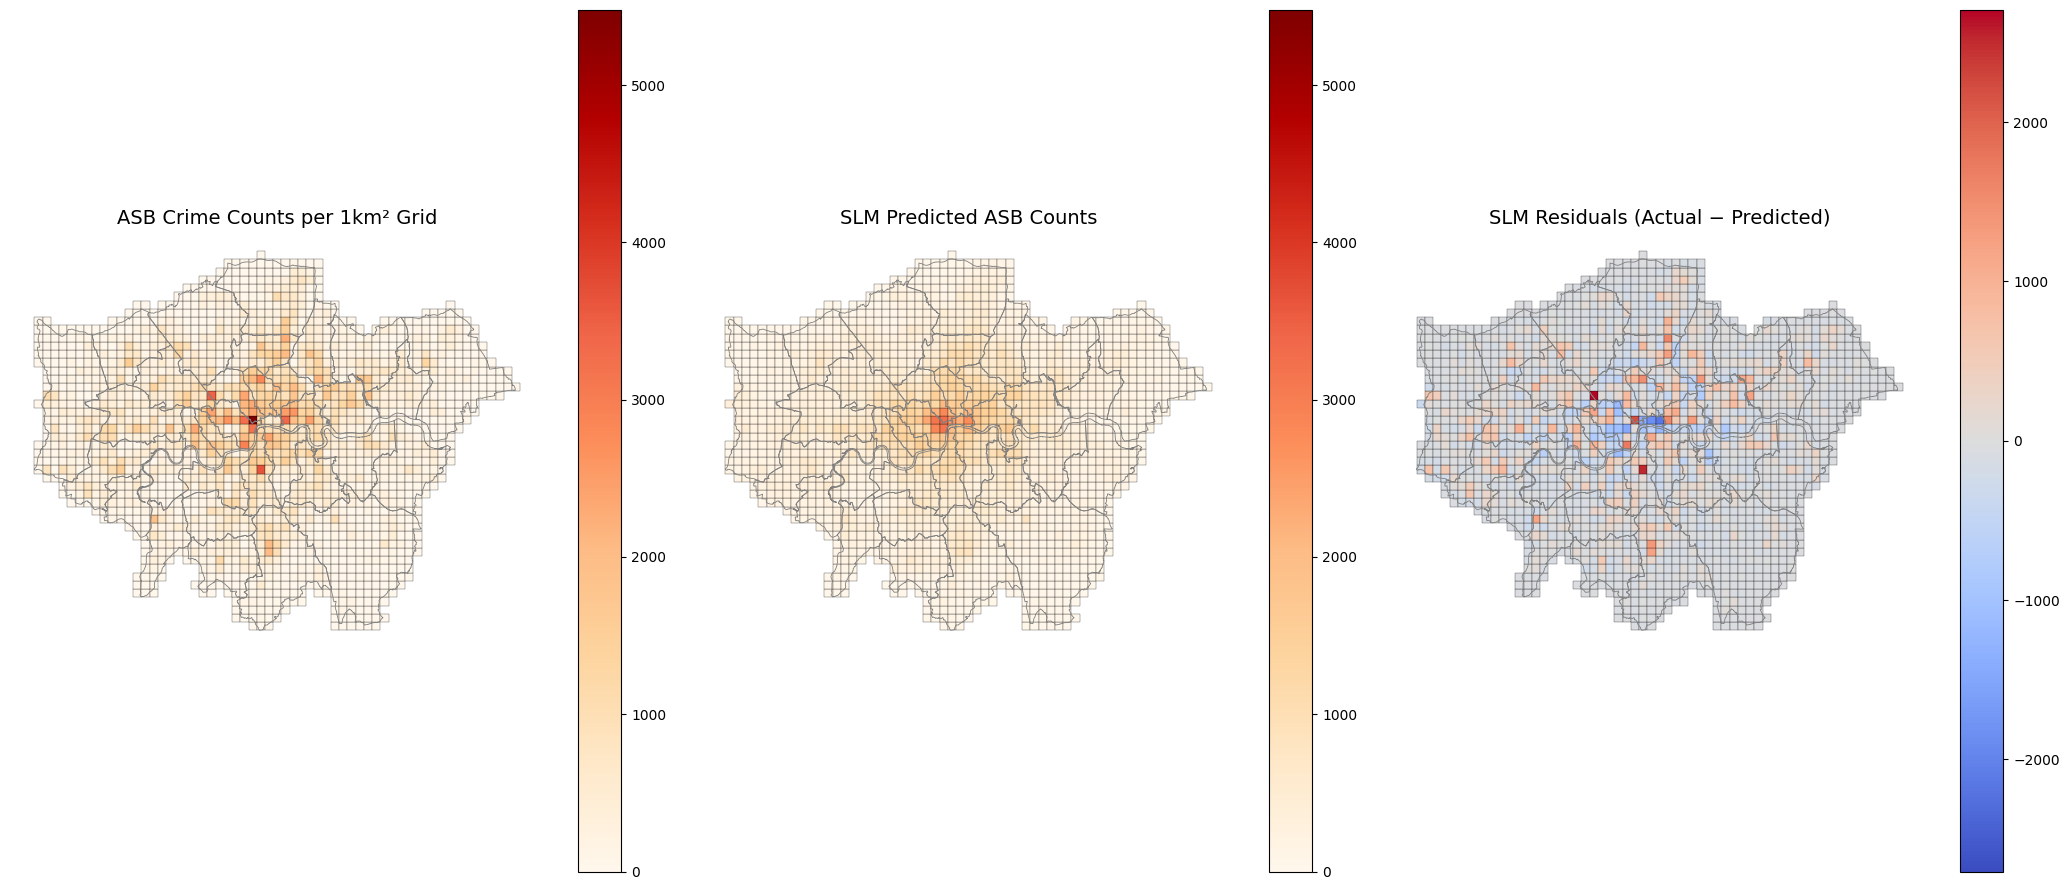

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#same scale for both actual aand predict maps
vmin = min(final_df['crime_counts'].min(), final_df['slm_pred'].min())
vmax = max(final_df['crime_counts'].max(), final_df['slm_pred'].max())

#symmetric scale for residuals actual-predicted values
rmax = np.nanmax(np.abs(final_df['resid_slm'].values))
rmin = -rmax

fig, axes = plt.subplots(1, 3, figsize=(21, 9))
#choropleth with london borogh overlaying
def plot_layer(ax, column, cmap, title, vmin=None, vmax=None):
    final_df.plot(
        column=column,
        cmap=cmap,
        edgecolor='black', linewidth=0.2,
        legend=True, vmin=vmin, vmax=vmax, ax=ax
    )
    try:
        gdf_london.boundary.plot(ax=ax, color='gray', linewidth=0.6)
    except Exception:
        pass
    ax.set_title(title, fontsize=14)
    ax.axis('off')

#  Actual counts
plot_layer(axes[0], 'crime_counts', 'OrRd',
           'ASB Crime Counts per 1km² Grid', vmin=vmin, vmax=vmax)

#  SLM predicted counts
plot_layer(axes[1], 'slm_pred', 'OrRd',
           'SLM Predicted ASB Counts', vmin=vmin, vmax=vmax)

# Residuals (Actual - Predicted)
plot_layer(axes[2], 'resid_slm', 'coolwarm',
           'SLM Residuals (Actual − Predicted)', vmin=rmin, vmax=rmax)

plt.tight_layout()
plt.show()


In [ ]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.7 MB/s eta 0:00:00


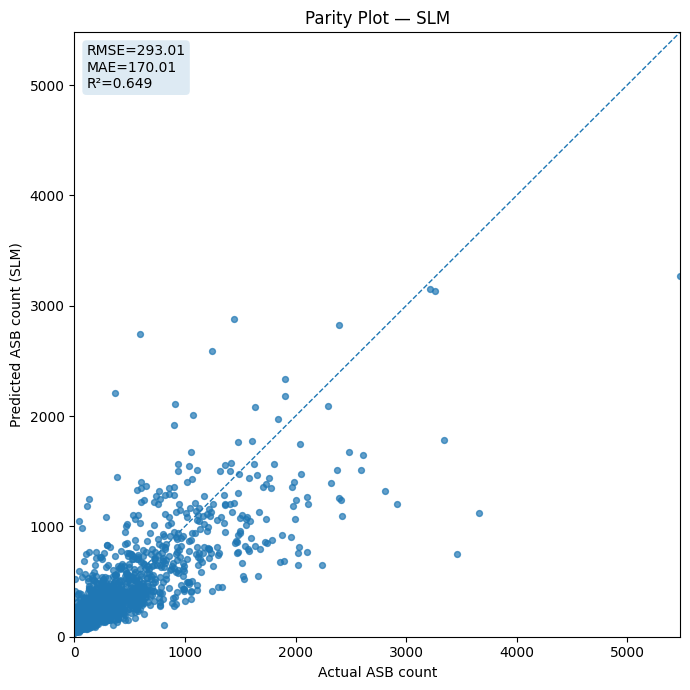

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# choose target column
target_col = 'crime_counts' if 'crime_counts' in final_df.columns else 'total_crime_counts'
y_true = final_df[target_col].to_numpy().astype(float)
y_pred = final_df['slm_pred'].to_numpy().astype(float)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred, s=18, alpha=0.7)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', linewidth=1)   # y = x reference
plt.xlim(lims); plt.ylim(lims)
plt.xlabel('Actual ASB count')
plt.ylabel('Predicted ASB count (SLM)')
plt.title('Parity Plot — SLM')
plt.text(0.02, 0.98, f'RMSE={rmse:.2f}\nMAE={mae:.2f}\nR²={r2:.3f}', transform=plt.gca().transAxes,
         ha='left', va='top', bbox=dict(boxstyle='round', alpha=0.15, lw=0.0))
plt.tight_layout(); plt.show()


In [ ]:
final_df

,grid_id,poi_counts,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,...,2024-08,2024-09,2024-10,2024-11,2024-12,crime_counts,geometry,crime_counts_lag,slm_pred,resid_slm
0,19,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,170.448322,-167.448322
1,20,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,12.0,"POLYGON ((503571.5 175854.3, 504571.5 175854.3...",185.2,155.693715,-143.693715
2,21,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 176854.3, 504571.5 176854.3...",28.6,61.973806,-61.973806
3,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 177854.3, 504571.5 177854.3...",32.0,59.874062,-59.874062
4,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((503571.5 182854.3, 504571.5 182854.3...",543.0,354.509301,-354.509301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2607,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((559571.5 186854.3, 560571.5 186854.3...",7.0,51.628420,-51.628420
1732,2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 184854.3, 561571.5 184854.3...",0.6,41.893605,-41.893605
1733,2652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 185854.3, 561571.5 185854.3...",0.5,41.836342,-41.836342
1734,2653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((560571.5 186854.3, 561571.5 186854.3...",0.0,41.550029,-41.550029


Reshaping Monthly Crime Data to Long Format

In [ ]:
# Renaming the existing 'crime_counts'  to avoid clash
if 'crime_counts' in final_df.columns:
    final_df = final_df.rename(columns={'crime_counts': 'crime_counts_tot'})


In [ ]:
import pandas as pd, re

# checking the month columns in my
month_cols = []
for c in final_df.columns:
    if isinstance(c, pd.Period):
        month_cols.append(c)
    elif isinstance(c, str) and re.fullmatch(r"\d{4}-\d{2}", c):
        month_cols.append(c)

# Safety check
assert len(month_cols) > 0, "No month columns found in final_df."

# changing it into  long format ofone row per grid_id × Month
final_asb_df = (
    final_df
    .melt(id_vars=['grid_id','poi_counts','geometry','crime_counts_lag',],
          value_vars=month_cols,
          var_name='Month', value_name='crime_counts')
    .copy()
)

#  Making a  monthly Period dtype
if not pd.api.types.is_period_dtype(final_asb_df['Month']):
    final_asb_df['Month'] = pd.PeriodIndex(final_asb_df['Month'].astype(str), freq='M')

/tmp/ipython-input-1110184169.py:24: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(final_asb_df['Month']):


/tmp/ipython-input-3140768222.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


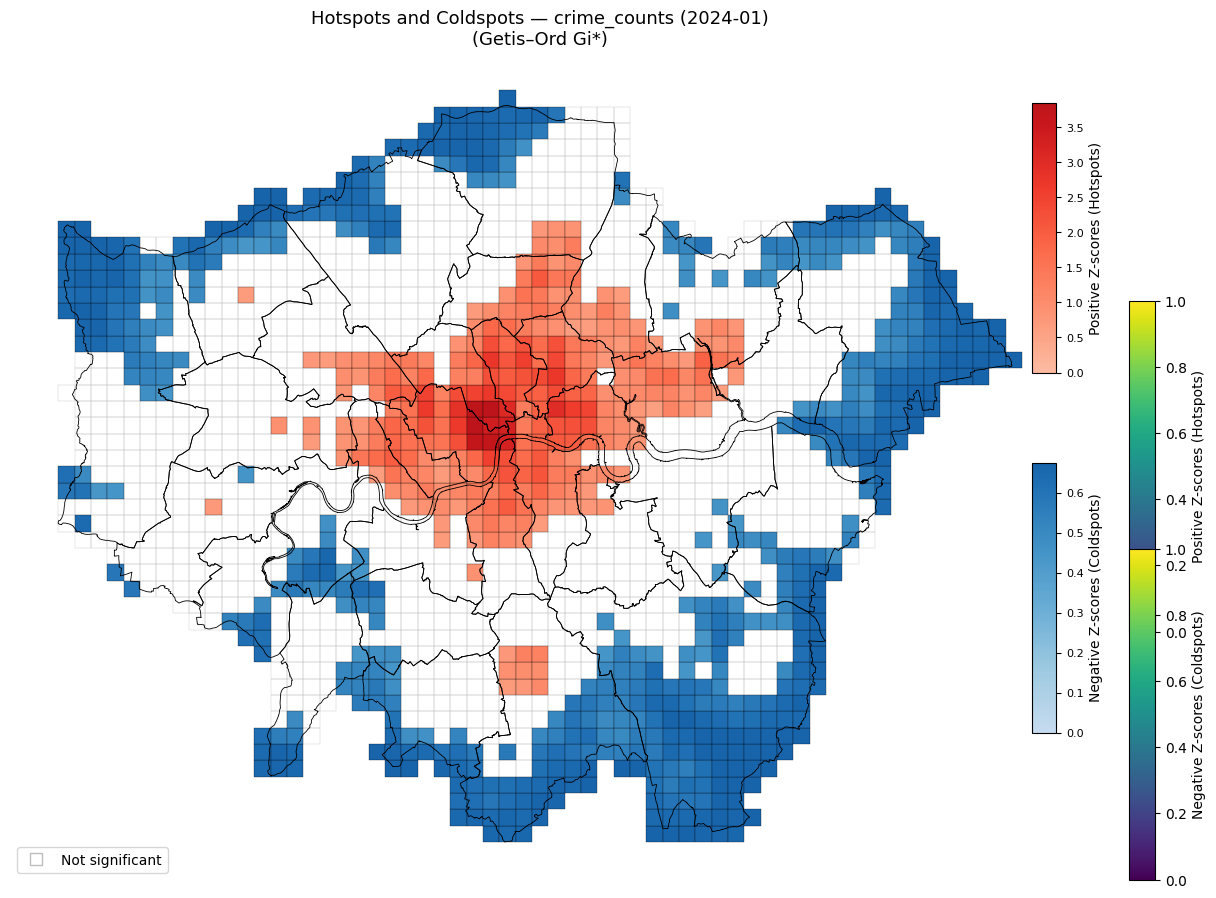

In [ ]:
# --- Lighter Hotspot/Coldspot Gi* map with separate colorbars (no contextily required) ---

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen
from esda.getisord import G_Local
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

# ===== CONFIG =====
TARGET_MONTH = pd.Period('2024-01', 'M')
VAR_COL = 'crime_counts'      # or 'y_pred_xgb', 'y_pred_cnn', 'slm_pred'
ALPHA = 0.05                  # significance threshold

# ===== PREP =====
gdf = final_asb_df[final_asb_df['Month'] == TARGET_MONTH].copy()
gdf[VAR_COL] = pd.to_numeric(gdf[VAR_COL], errors='coerce').fillna(0)

# Weights (Queen contiguity)
grid = gdf[['grid_id','geometry']].drop_duplicates('grid_id').set_index('grid_id').sort_index()
w = Queen.from_dataframe(grid, ids=grid.index); w.transform = 'r'
y = (gdf.set_index('grid_id').reindex(grid.index)[VAR_COL].fillna(0).to_numpy())

# Gi*
gi = G_Local(y, w)
gdf = gdf.set_index('grid_id').reindex(grid.index).reset_index()
gdf['GiZ'] = gi.Zs
gdf['GiP'] = gi.p_sim

sig = gdf['GiP'] <= ALPHA
pos = sig & (gdf['GiZ'] > 0)   # hotspots
neg = sig & (gdf['GiZ'] < 0)   # coldspots
ns  = ~sig

# Lighten colormaps by truncating the range
def light_cmap(base='Reds', vmin=0.25, vmax=0.80):
    base_cmap = plt.get_cmap(base)
    colors = base_cmap(np.linspace(vmin, vmax, 256))
    return LinearSegmentedColormap.from_list(f'{base}_light', colors)

reds_light  = light_cmap('Reds',  vmin=0.25, vmax=0.80)
blues_light = light_cmap('Blues', vmin=0.25, vmax=0.80)

# ===== PLOT =====
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# Not significant outlines
gdf.loc[ns].plot(ax=ax, color='none', edgecolor='#bdbdbd', linewidth=0.25)

# Hotspots (positive Z) — Reds
pcm_pos = None
if pos.any():
    norm_pos = Normalize(vmin=0, vmax=float(gdf.loc[pos, 'GiZ'].max()))
    pcm_pos = gdf.loc[pos].plot(
        ax=ax, column='GiZ', cmap=reds_light, norm=norm_pos,
        edgecolor='black', linewidth=0.2
    )

# Coldspots (negative Z) — Blues (use abs for scale)
pcm_neg = None
if neg.any():
    gdf.loc[neg, '_GiAbs'] = gdf.loc[neg, 'GiZ'].abs()
    norm_neg = Normalize(vmin=0, vmax=float(gdf.loc[neg, '_GiAbs'].max()))
    pcm_neg = gdf.loc[neg].plot(
        ax=ax, column='_GiAbs', cmap=blues_light, norm=norm_neg,
        edgecolor='black', linewidth=0.2
    )

# Borough outlines (optional)
try:
    if 'gdf_london' in globals() and gdf_london is not None:
        if gdf_london.crs != gdf.crs:
            gdf_london = gdf_london.to_crs(gdf.crs)
        gdf_london.boundary.plot(ax=ax, color='black', linewidth=0.6)
except Exception:
    pass

ax.set_title(f'Hotspots and Coldspots — {VAR_COL} ({TARGET_MONTH})\n(Getis–Ord Gi*)', fontsize=13)
ax.axis('off')

# Legend for "Not significant" (fixed: pass handles and labels)
not_sig_handle = Line2D([0], [0], marker='s', linestyle='None', color='w',
                        markerfacecolor='none', markeredgecolor='#bdbdbd', markersize=8)
ax.legend(handles=[not_sig_handle], labels=['Not significant'], loc='lower left')

# Separate colorbars on the right
if pcm_pos is not None:
    cax_pos = inset_axes(ax, width="2.5%", height="40%", loc='center right',
                         bbox_to_anchor=(0.08, 0.0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
    cb_pos = fig.colorbar(pcm_pos.collections[0], cax=cax_pos, orientation='vertical')
    cb_pos.set_label('Positive Z-scores (Hotspots)')

if pcm_neg is not None:
    cax_neg = inset_axes(ax, width="2.5%", height="40%", loc='lower right',
                         bbox_to_anchor=(0.08, 0.0, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
    cb_neg = fig.colorbar(pcm_neg.collections[0], cax=cax_neg, orientation='vertical')
    cb_neg.set_label('Negative Z-scores (Coldspots)')
    import matplotlib.cm as cm

# --- choose consistent ranges (optional: cap at 3σ) ---
# pos_max = float(gdf.loc[pos, 'GiZ'].max()) if pos.any() else 1.0
# neg_max = float(gdf.loc[neg, '_GiAbs'].max()) if neg.any() else 1.0
# norm_pos = Normalize(vmin=0, vmax=min(3.0, pos_max))
# norm_neg = Normalize(vmin=0, vmax=min(3.0, neg_max))

# --- make two separate colorbar axes on the right side ---
# [left, bottom, width, height] in figure fraction (tweak if you want)
if pos.any():
    cax_pos = fig.add_axes([0.91, 0.58, 0.02, 0.30])  # top bar
    sm_pos = cm.ScalarMappable(norm=norm_pos, cmap=reds_light)
    sm_pos.set_array([])
    cb_pos = fig.colorbar(sm_pos, cax=cax_pos, orientation='vertical')
    cb_pos.set_label('Positive Z-scores (Hotspots)')
    cb_pos.ax.tick_params(labelsize=8)

if neg.any():
    cax_neg = fig.add_axes([0.91, 0.18, 0.02, 0.30])  # bottom bar
    sm_neg = cm.ScalarMappable(norm=norm_neg, cmap=blues_light)
    sm_neg.set_array([])
    cb_neg = fig.colorbar(sm_neg, cax=cax_neg, orientation='vertical')
    cb_neg.set_label('Negative Z-scores (Coldspots)')
    cb_neg.ax.tick_params(labelsize=8)


plt.tight_layout()
plt.show()


TEMPORAL LAG BY PAST 1 MONTH

In [ ]:
# adding 1-month temporal lag per grid (t-1)
final_asb_df = final_asb_df.sort_values(['grid_id', 'Month'])
final_asb_df['crime_counts_tlag1'] = (
    final_asb_df.groupby('grid_id')['crime_counts'].shift(1).fillna(0)
)


In [ ]:
final_asb_df

,grid_id,poi_counts,geometry,crime_counts_lag,Month,crime_counts,crime_counts_tlag1
0,19,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,2022-05,0.0,0.0
1736,19,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,2022-06,0.0,0.0
3472,19,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,2022-07,1.0,0.0
5208,19,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,2022-08,0.0,1.0
6944,19,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3...",214.5,2022-09,1.0,0.0
...,...,...,...,...,...,...,...
48607,2697,0.0,"POLYGON ((561571.5 184854.3, 562571.5 184854.3...",0.0,2024-08,0.0,1.0
50343,2697,0.0,"POLYGON ((561571.5 184854.3, 562571.5 184854.3...",0.0,2024-09,0.0,0.0
52079,2697,0.0,"POLYGON ((561571.5 184854.3, 562571.5 184854.3...",0.0,2024-10,0.0,0.0
53815,2697,0.0,"POLYGON ((561571.5 184854.3, 562571.5 184854.3...",0.0,2024-11,0.0,0.0


spatial lag BY PAST 1 MONTHA

In [ ]:
import pandas as pd
from libpysal.weights import Queen
from libpysal.weights.spatial_lag import lag_spatial

# Just making sure Month is stored as a monthly period — avoids weirdness with time operations
if not isinstance(final_asb_df['Month'].dtype, pd.PeriodDtype):
    final_asb_df['Month'] = pd.to_datetime(final_asb_df['Month']).dt.to_period('M')

# grid_id should be a nice clean integer, and let's keep the rows ordered by Month then grid_id
final_asb_df['grid_id'] = final_asb_df['grid_id'].astype(int)
final_asb_df = final_asb_df.sort_values(['Month', 'grid_id']).copy()

# Add the previous month’s crime counts for each grid — helps spot trends over time
final_asb_df['crime_counts_tlag1'] = (
    final_asb_df.groupby('grid_id')['crime_counts'].shift(1).fillna(0)  # shift(1) = one month back
)

# Get one geometry per grid_id so we can calculate spatial relationships
grid_gdf = (
    final_asb_df[['grid_id', 'geometry']]
    .drop_duplicates('grid_id')  # only keep one row for each grid
    .set_index('grid_id')        # makes it easier to reference later
    .sort_index()                # so everything’s in a predictable order
)

# Build Queen contiguity weights — grids that touch at edges or corners are considered neighbours
w = Queen.from_dataframe(grid_gdf, ids=grid_gdf.index)
w.transform = 'r'  # row-standardising so weights add up to 1 for each row

def add_monthly_slag(df_m):
    # Crime counts for this month, lined up with the grid order we built earlier
    s = (
        df_m.set_index('grid_id')
        .reindex(grid_gdf.index)['crime_counts']
        .fillna(0)
        .values
    )
    # Weighted average of neighbouring crime (thanks to Queen contiguity)
    slag = lag_spatial(w, s)
    # Stick these numbers back into the df so each grid knows its neighbours' crime level
    df_m['crime_counts_lag'] = df_m['grid_id'].map(
        dict(zip(grid_gdf.index, slag))
    )
    return df_m

# Run the spatial lag calculation separately for each month
final_asb_df = final_asb_df.groupby('Month', group_keys=False).apply(add_monthly_slag)

# Keep only the bits we actually need for the model
final_asb_df = final_asb_df[[
    'grid_id', 'Month', 'crime_counts',        # target variable
    'crime_counts_tlag1', 'crime_counts_lag',  # time & space-based lags
    'poi_counts', 'geometry'                   # features & shape info
]].copy()
print(final_asb_df.head(), final_asb_df.shape)


   grid_id    Month  crime_counts  crime_counts_tlag1  crime_counts_lag  \
0       19  2022-05           0.0                 0.0          6.750000   
1       20  2022-05           0.0                 0.0          5.600000   
2       21  2022-05           0.0                 0.0          1.400000   
3       22  2022-05           0.0                 0.0          1.250000   
4       27  2022-05           0.0                 0.0         20.333333   

   poi_counts                                           geometry  
0         3.0  POLYGON ((503571.5 174854.3, 504571.5 174854.3...  
1         4.0  POLYGON ((503571.5 175854.3, 504571.5 175854.3...  
2         2.0  POLYGON ((503571.5 176854.3, 504571.5 176854.3...  
3         0.0  POLYGON ((503571.5 177854.3, 504571.5 177854.3...  
4         1.0  POLYGON ((503571.5 182854.3, 504571.5 182854.3...   (55552, 7)


/tmp/ipython-input-3208363508.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_asb_df = final_asb_df.groupby('Month', group_keys=False).apply(add_monthly_slag)


In [ ]:
final_asb_df

,grid_id,Month,crime_counts,crime_counts_tlag1,crime_counts_lag,poi_counts,geometry
0,19,2022-05,0.0,0.0,6.750000,3.0,"POLYGON ((503571.5 174854.3, 504571.5 174854.3..."
1,20,2022-05,0.0,0.0,5.600000,4.0,"POLYGON ((503571.5 175854.3, 504571.5 175854.3..."
2,21,2022-05,0.0,0.0,1.400000,2.0,"POLYGON ((503571.5 176854.3, 504571.5 176854.3..."
3,22,2022-05,0.0,0.0,1.250000,0.0,"POLYGON ((503571.5 177854.3, 504571.5 177854.3..."
4,27,2022-05,0.0,0.0,20.333333,1.0,"POLYGON ((503571.5 182854.3, 504571.5 182854.3..."
...,...,...,...,...,...,...,...
55547,2607,2024-12,0.0,0.0,0.000000,3.0,"POLYGON ((559571.5 186854.3, 560571.5 186854.3..."
55548,2651,2024-12,0.0,0.0,0.000000,0.0,"POLYGON ((560571.5 184854.3, 561571.5 184854.3..."
55549,2652,2024-12,0.0,0.0,0.000000,0.0,"POLYGON ((560571.5 185854.3, 561571.5 185854.3..."
55550,2653,2024-12,0.0,0.0,0.000000,0.0,"POLYGON ((560571.5 186854.3, 561571.5 186854.3..."


In [ ]:
final_asb_df.dtypes
final_asb_df['Month'].min(), final_asb_df['Month'].max()
final_asb_df.isna().sum()


,0
grid_id,0
Month,0
crime_counts,0
crime_counts_tlag1,0
crime_counts_lag,0
poi_counts,0
geometry,0


XGBOOST MODELLING

TARGET AND FEATURES

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Columns we’re going to feed into the model — basically the predictors
features = ['poi_counts', 'crime_counts_lag', 'crime_counts_tlag1']

# The thing we’re actually trying to predict (y-values for the model)
target = 'crime_counts'


In [ ]:
# just checking the month is period
if not pd.api.types.is_period_dtype(final_asb_df['Month']):
    final_asb_df['Month'] = pd.to_datetime(final_asb_df['Month']).dt.to_period('M')

/tmp/ipython-input-1022362276.py:2: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(final_asb_df['Month']):


MODEL TRAINING AND TEST SPLITING

In [ ]:
# We'll train on all of 2023, then test on Jan 2024
train_mask = final_asb_df['Month'].between(pd.Period('2023-01', 'M'),
                                           pd.Period('2023-12', 'M'))

# Testing is just January 2024 — fresh data the model hasn’t seen
test_mask = (final_asb_df['Month'] == pd.Period('2024-01', 'M'))

# Slice the training features (X) and target (y)
X_train = final_asb_df.loc[train_mask, features].values
y_train = final_asb_df.loc[train_mask, target].values

# Same thing for the test set
X_test = final_asb_df.loc[test_mask, features].values
y_test = final_asb_df.loc[test_mask, target].values
print("Train rows:", X_train.shape[0], " Test rows:", X_test.shape[0])


Train rows: 20832  Test rows: 1736


In [ ]:
# Setting up the XGBoost regressor with parameters I’ve found work well here
xgb = XGBRegressor(
    n_estimators=600,       # total trees — higher = more learning but slower
    max_depth=4,            # how “deep” each tree can grow (controls complexity)
    learning_rate=0.05,     # smaller step sizes to avoid the model getting too confident too quickly
    subsample=0.9,          # use most, but not all, training rows per tree
    colsample_bytree=0.9,   # same idea but for features instead of rows
    reg_lambda=1.0,         # a bit of L2 regularization to keep weights sensible
    random_state=42,        # fixed seed so results are repeatable
    n_jobs=-1               # let it use all CPU cores (because why not)
)

# Train the model — this is where it chews through the data and learns patterns
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# Predictions and metrics
# asking the model to predict crime counts for our test set
y_pred = xgb.predict(X_test)

# EVALUATION
mse  = mean_squared_error(y_test, y_pred)  # squared error, lower = better
rmse = np.sqrt(mse)                        # same as above but in original units
mae  = mean_absolute_error(y_test, y_pred) # average absolute error
r2   = r2_score(y_test, y_pred)            # how much variance we explained (1.0 is perfect)
print(f"RMSE: {rmse:.3f}  MAE: {mae:.3f}  R²: {r2:.3f}")

# Pull just the January 2024 rows from the dataframe
pred_2024_01 = final_asb_df.loc[test_mask, ['grid_id', 'Month', 'geometry']].copy()

# Attach both the real and predicted values so we can compare them later
pred_2024_01['y_true'] = y_test
pred_2024_01['y_pred'] = y_pred


RMSE: 5.396  MAE: 3.180  R²: 0.853


In [ ]:
# --- Save model ---
xgb.save_model("xgb_asb_model.json")  # JSON format

# --- Load model later ---
from xgboost import XGBRegressor
xgb_loaded = XGBRegressor()
xgb_loaded.load_model("xgb_asb_model.json")


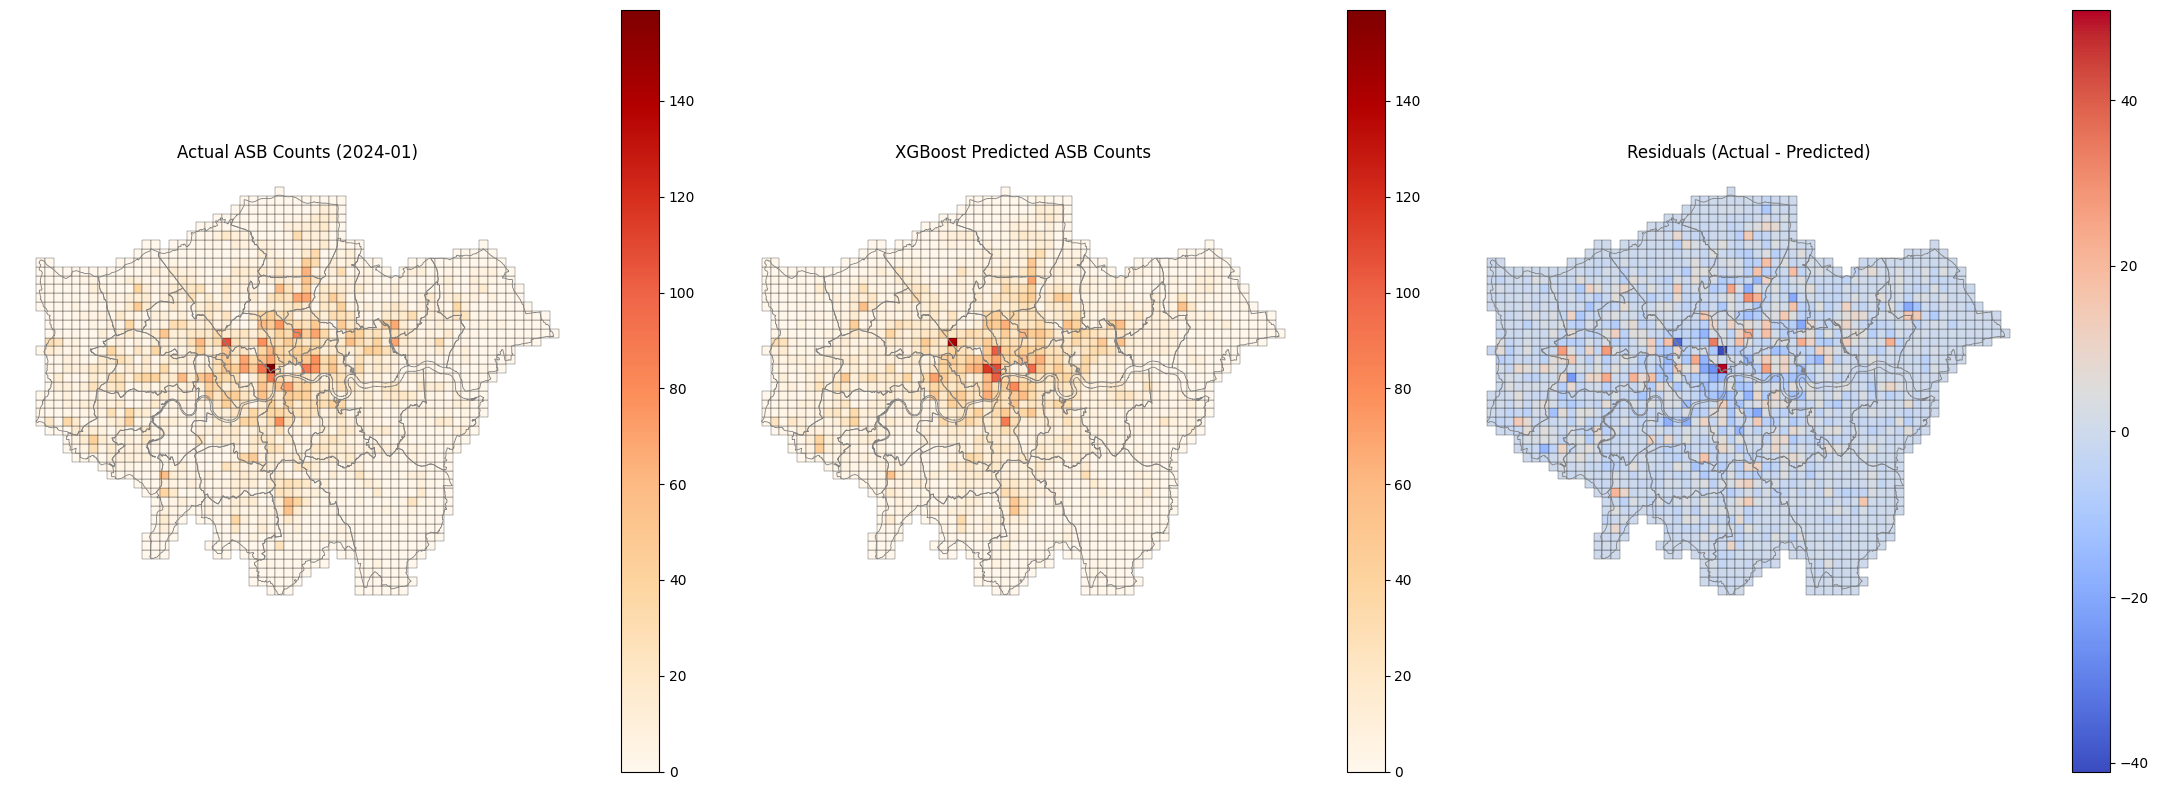

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#XG BOOST FEATURES AND TARGRT
FEATURES   = ['poi_counts','crime_counts_lag','crime_counts_tlag1']
TARGET_M   = pd.Period('2024-01', 'M')  # month to map

# Ensure Month is Period[M]
if not isinstance(final_asb_df['Month'].dtype, pd.PeriodDtype):
    final_asb_df['Month'] = pd.to_datetime(final_asb_df['Month']).dt.to_period('M')

# --- build X for the 2024-01 slice ---
test_slice = final_asb_df[final_asb_df['Month'] == TARGET_M].copy()

X_test_xgb = test_slice[FEATURES].to_numpy(dtype=np.float32)
y_true      = test_slice['crime_counts'].to_numpy(dtype=np.float32)

# predict with your trained XGBoost model (assumes variable name `xgb`)
y_pred_xgb = xgb.predict(X_test_xgb)

# --- assemble GeoDF for mapping ---
gmap_xgb = test_slice[['grid_id','geometry']].copy()
gmap_xgb['y_true']    = y_true
gmap_xgb['y_pred_xgb'] = y_pred_xgb
gmap_xgb['resid_xgb']  = gmap_xgb['y_true'] - gmap_xgb['y_pred_xgb']

# --- side-by-side maps ---
vmin = min(gmap_xgb['y_true'].min(), gmap_xgb['y_pred_xgb'].min())
vmax = max(gmap_xgb['y_true'].max(), gmap_xgb['y_pred_xgb'].max())

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# 1) Actual
gmap_xgb.plot(
    column='y_true', cmap='OrRd', edgecolor='black', linewidth=0.2,
    legend=True, vmin=vmin, vmax=vmax, ax=axes[0]
)
axes[0].set_title('Actual ASB Counts (2024-01)')
axes[0].axis('off')

# 2) XGBoost prediction
gmap_xgb.plot(
    column='y_pred_xgb', cmap='OrRd', edgecolor='black', linewidth=0.2,
    legend=True, vmin=vmin, vmax=vmax, ax=axes[1]
)
axes[1].set_title('XGBoost Predicted ASB Counts')
axes[1].axis('off')

# 3) Residuals(actual crime counts - predicted)
gmap_xgb.plot(
    column='resid_xgb', cmap='coolwarm', edgecolor='black', linewidth=0.2,
    legend=True, ax=axes[2]
)
axes[2].set_title('Residuals (Actual - Predicted)')
axes[2].axis('off')

# overlaying borough boundaries
try:
    gdf_london.boundary.plot(ax=axes[0], color='gray', linewidth=0.6)
    gdf_london.boundary.plot(ax=axes[1], color='gray', linewidth=0.6)
    gdf_london.boundary.plot(ax=axes[2], color='gray', linewidth=0.6)
except Exception:
    pass

plt.tight_layout()
plt.show()


DEEP LEARNING MODEL(CNN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler#scalling tool
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras  # I just prefer importing Keras like this, feels cleaner to me

# ---- Setting up config for my temporal CNN experiment ----
# Note to self: SEQ_LEN is basically "how far back in time" we peek
SEQ_LEN = 6    # here it's 6 months back per training example (rolling window)

# List of features we’ll have for *each* month in that sequence window
FEATURES = [
    'crime_counts',        # actual ASB count that month (grid-specific)
    'crime_counts_lag',    # spatial lag → neighbors' average for the SAME month
    'crime_counts_tlag1',  # temporal lag → previous month for this grid
    'poi_counts'           # static info: density of POIs (points of interest)
    # I was tempted to add more features but let's not get ahead of ourselves...
]

# This is what we’re actually predicting:
# one month *after the end of our rolling window
TARGET = 'crime_counts'    # yes, same as first feature but used differently here



In [ ]:
if not isinstance(final_asb_df['Month'].dtype, pd.PeriodDtype):
    final_asb_df['Month'] = pd.to_datetime(final_asb_df['Month']).dt.to_period('M')
#sort by grid id and month
final_asb_df = final_asb_df.sort_values(['grid_id','Month']).reset_index(drop=True)

train_end   = pd.Period('2023-12','M')  # last month included in train windows
test_target = pd.Period('2024-01','M')  # month to predict for the test

In [ ]:
train_end#target month is January 2023 through december 2023

Period('2023-12', 'M')

In [ ]:
test_target

Period('2024-01', 'M')

building sliding windows per grid

In [ ]:
import numpy as np
import pandas as pd

def build_sequences(df, seq_len, feature_cols, target_col, train_end, test_target):
    """
    Build temporal sequences for a supervised model.
For each grid_id:
  - X = previous `seq_len` months of features (shape: seq_len × n_features)
  - y = target value at the month immediately AFTER that window
Rules:
  - TARGET month <= train_end → goes into training
  - TARGET month == test_target → goes into testing
Returns:
      X_train, y_train, X_test, y_test, test_grid_ids
    """

    # Prep containers
    X_train, y_train = [], []
    X_test,  y_test  = [], []
    test_grid_ids    = []   # keep IDs for test rows — helps when mapping predictions back

    df = df.copy()  # defensive copy so original df isn't touched

    # its my little routine to make sure the month is in period
    if not isinstance(df['Month'].dtype, pd.PeriodDtype):
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce').dt.to_period('M')
    df['grid_id'] = df['grid_id'].astype(int)

    # Force numeric for all features + target, replacing NaN with 0 for simplicity(a bit of cleaning)
    for c in list(feature_cols) + ([target_col] if isinstance(target_col, str) else list(target_col)):
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

    #  target column will be passed as list or tuple
    if not isinstance(target_col, str):
        if isinstance(target_col, (list, tuple, np.ndarray)) and len(target_col) == 1:
            target_col = target_col[0]
        else:
            raise TypeError(f"'target_col' must be a single string column name. Got: {target_col!r}")

    # creating a sequence grid
    for gid, g in df.groupby('grid_id', sort=False):
        # Keep relevant columns and sort as sequence
        g = g[['Month'] + list(feature_cols) + [target_col]].sort_values('Month').reset_index(drop=True)

        # Slide a time window
        for i in range(seq_len, len(g)):
            window     = g.iloc[i-seq_len:i]  # previous seq_len months
            target_row = g.iloc[i]            # month right after the window

            X = window[list(feature_cols)].to_numpy(dtype=np.float32)

            # Get the scalar y — extra check for unexpected Series
            val = target_row[target_col]
            if isinstance(val, pd.Series):
                val = val.iloc[0]
            y = float(val)

            # Decide if it’s training or testing data for eg it goes untill 2024-12 the traing set
            if target_row['Month'] <= train_end:
                X_train.append(X)
                y_train.append(y)
            elif target_row['Month'] == test_target:
                X_test.append(X)
                y_test.append(y)
                test_grid_ids.append(int(gid))

    # converting lists to an arrays
    X_train       = np.asarray(X_train, dtype=np.float32)
    y_train       = np.asarray(y_train, dtype=np.float32)
    X_test        = np.asarray(X_test,  dtype=np.float32)
    y_test        = np.asarray(y_test,  dtype=np.float32)
    test_grid_ids = np.asarray(test_grid_ids, dtype=int)

    return X_train, y_train, X_test, y_test, test_grid_ids


In [ ]:
SEQ_LEN   = 6
FEATURES  = ['crime_counts','crime_counts_lag','crime_counts_tlag1','poi_counts']
TARGET    = 'crime_counts'             # <- must be a string
train_end = pd.Period('2023-12','M')
test_tgt  = pd.Period('2024-01','M')

X_train, y_train, X_test, y_test, test_grid_ids = build_sequences(
    final_asb_df, SEQ_LEN, FEATURES, TARGET, train_end, test_tgt
)

print("Train windows:", X_train.shape, " Test windows:", X_test.shape)


Train windows: (24304, 6, 5)  Test windows: (1736, 6, 5)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras

#  already have X_train, y_train, X_test, y_test, test_grid_ids from build_sequences() ---
SEQ_LEN = X_train.shape[1]  # number of months in each input sequence
N_FEAT  = X_train.shape[2]  # how many features per month

# Scaling  features (only to fit on training data to  make sure avoiding data leakage)
scaler = StandardScaler()

# Flatten thw  sequences so the  scaler works as (samples*seq_len, features) fine
Xtr2 = X_train.reshape(-1, N_FEAT)
Xte2 = X_test.reshape(-1,  N_FEAT)

# Fiting the scaler on train and apply to both train & test
Xtr2 = scaler.fit_transform(Xtr2)
Xte2 = scaler.transform(Xte2)

# Reshaping back to 3D (samples, seq_len, features) for the CNN(convential neaural networks)
X_train_s = Xtr2.reshape(X_train.shape)
X_test_s  = Xte2.reshape(X_test.shape)

# OUR CNN
tf.random.set_seed(42)  # reproducibility — same results every run

inp = keras.Input(shape=(SEQ_LEN, N_FEAT))  # sequences as input
x = keras.layers.Conv1D(64, 3, padding='causal', activation='relu')(inp)  # causal keeps time order
x = keras.layers.Conv1D(64, 3, padding='causal', activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)  # helps prevent overfitting
x = keras.layers.Conv1D(32, 3, padding='causal', activation='relu')(x)
x = keras.layers.GlobalAveragePooling1D()(x)  # condense time dimension into a vector
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(16, activation='relu')(x)
out = keras.layers.Dense(1)(x)  # final output is a single number (regression)

model = keras.Model(inp, out)
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=[keras.metrics.MeanAbsoluteError(name='mae')]
)

# traning callbacks
ckpt_path = "cnn_best.weights.h5"
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', patience=6, factor=0.5, min_lr=1e-5
    ),
    keras.callbacks.ModelCheckpoint(
        ckpt_path, monitor='val_loss', save_best_only=True,
        save_weights_only=True, mode='min', verbose=1
    )
]

# model traing
hist = model.fit(
    X_train_s, y_train,
    validation_split=0.1,   # hold out 10% of train for validation
    epochs=250,             # max training passes
    batch_size=256,         # how many sequences per batch
    callbacks=callbacks,
    verbose=1
)

# loading the best porformance model weight
model.load_weights(ckpt_path)
best_epoch = int(np.argmin(hist.history['val_loss']) + 1)
print(f"Loaded best weights from epoch {best_epoch} (val_loss={min(hist.history['val_loss']):.4f})")

# evaluate on best performing spatial weights
y_pred = model.predict(X_test_s, verbose=0).ravel()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"CNN — RMSE: {rmse:.3f}  MAE: {mae:.3f}  R²: {r2:.3f}")

#just preparing the gdf for mapping
test_target = pd.Period('2024-01', 'M')
gmap = (
    final_asb_df[final_asb_df['Month'] == test_target]  # only 2024-01 rows
    .drop_duplicates('grid_id')                         # one per grid cell
    .set_index('grid_id')[['geometry']]                 # keep geometry column
    .loc[test_grid_ids]                                 # align to test order
    .reset_index()
)

# Attach actual vs predicted values
gmap['y_true'] = y_test
gmap['y_pred_cnn'] = y_pred


Epoch 1/250
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 240.4640 - mae: 8.7372
Epoch 1: val_loss improved from inf to 10.17496, saving model to cnn_best.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 239.3173 - mae: 8.7135 - val_loss: 10.1750 - val_mae: 2.4473 - learning_rate: 0.0010
Epoch 2/250
78/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.7822 - mae: 4.5696
Epoch 2: val_loss improved from 10.17496 to 7.08698, saving model to cnn_best.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 59.2766 - mae: 4.5488 - val_loss: 7.0870 - val_mae: 1.6564 - learning_rate: 0.0010
Epoch 3/250
75/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6970 - mae: 4.1162
Epoch 3: val_loss improved from 7.08698 to 6.40361, saving model to cnn_best.weights.h5
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.1177 - mae: 4.0976 - val_loss: 6.4036 - val_mae: 1.4492 - learning_rate: 0.0010
Epoch 4/250
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.6224 - mae: 3.9035
Epoch 4: val_loss 

In [ ]:
y_pred = model.predict(X_test_s, verbose=0).ravel()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"CNN — RMSE: {rmse:.3f}  MAE: {mae:.3f}  R²: {r2:.3f}")


CNN — RMSE: 5.215  MAE: 3.060  R²: 0.863


In [ ]:
# Save CNN model
model.save("cnn_asb_model.h5")


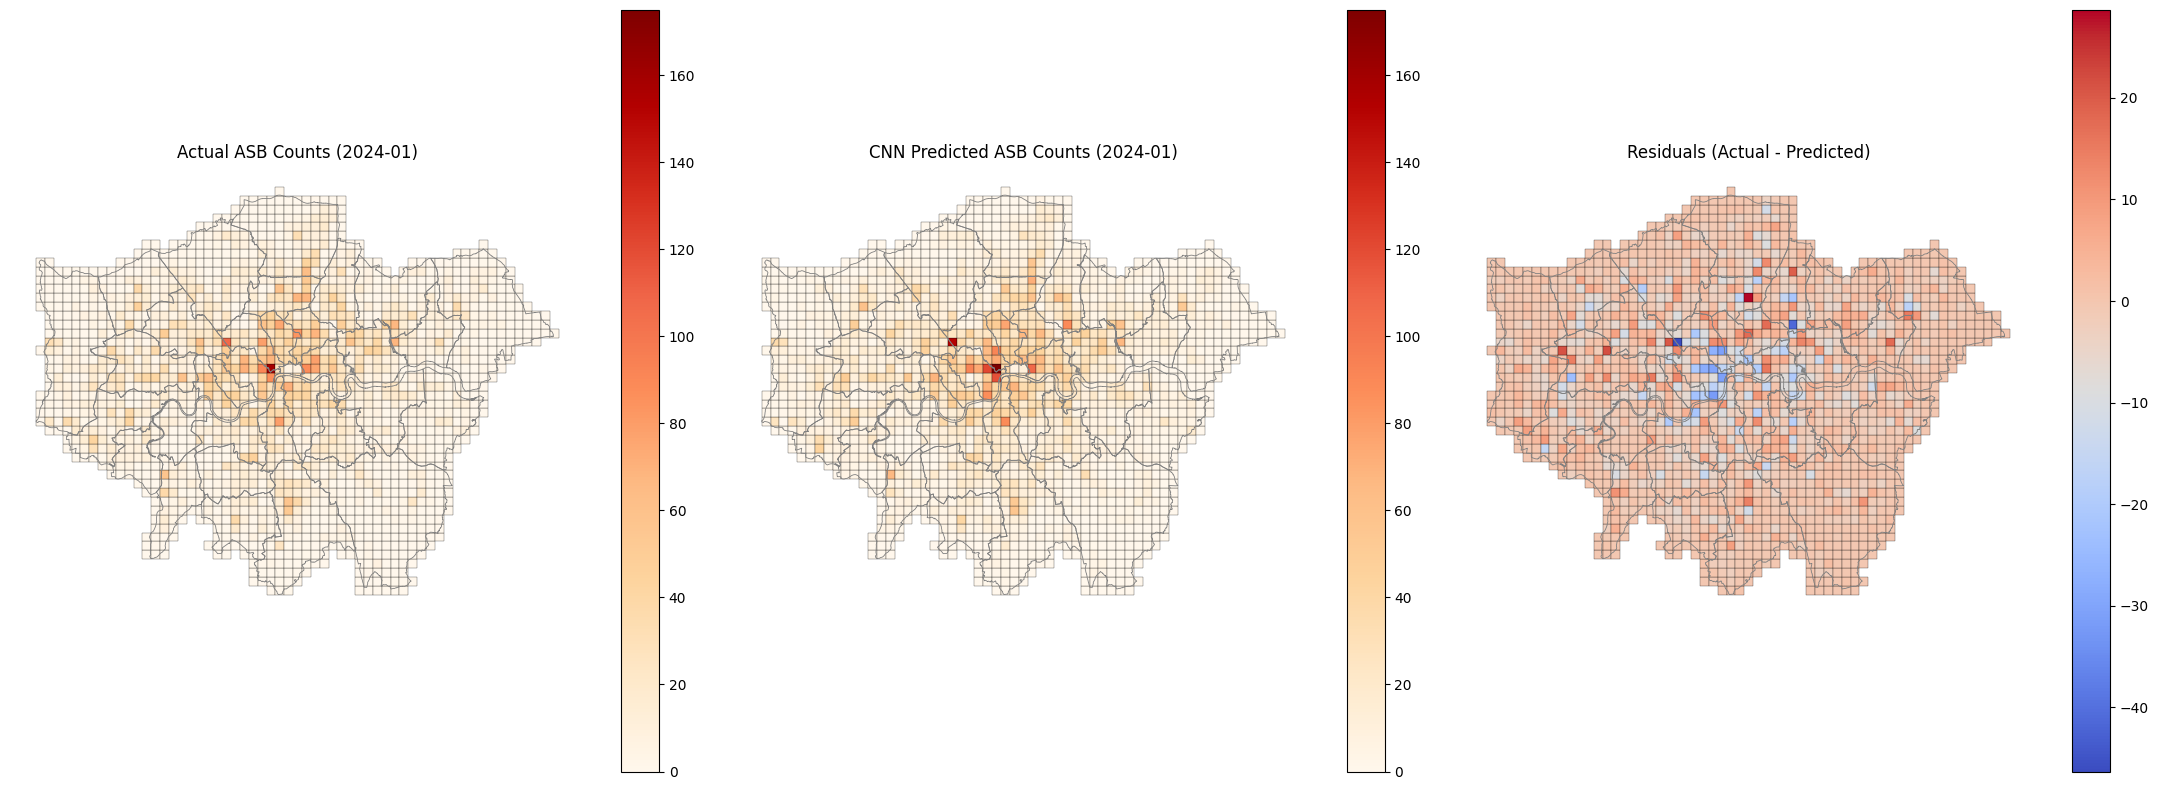

In [ ]:
import matplotlib.pyplot as plt

# Compute residuals
gmap['resid_cnn'] = gmap['y_true'] - gmap['y_pred_cnn']

# Shared color range for predictions vs actual
vmin = min(gmap['y_true'].min(), gmap['y_pred_cnn'].min())
vmax = max(gmap['y_true'].max(), gmap['y_pred_cnn'].max())

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Actual
gmap.plot(column='y_true', cmap='OrRd', linewidth=0.2, edgecolor='black',
          legend=True, vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title('Actual ASB Counts (2024-01)')
axes[0].axis('off')

# Predicted
gmap.plot(column='y_pred_cnn', cmap='OrRd', linewidth=0.2, edgecolor='black',
          legend=True, vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title('CNN Predicted ASB Counts (2024-01)')
axes[1].axis('off')

# Residuals
gmap.plot(column='resid_cnn', cmap='coolwarm', linewidth=0.2, edgecolor='black',
          legend=True, ax=axes[2])
axes[2].set_title('Residuals (Actual - Predicted)')
axes[2].axis('off')
# Optional: overlay borough boundaries if you have gdf_london
try:
    gdf_london.boundary.plot(ax=axes[0], color='gray', linewidth=0.6)
    gdf_london.boundary.plot(ax=axes[1], color='gray', linewidth=0.6)
    gdf_london.boundary.plot(ax=axes[2], color='gray', linewidth=0.6)
except Exception:
    pass
plt.tight_layout()
plt.show()


COMAPRISON

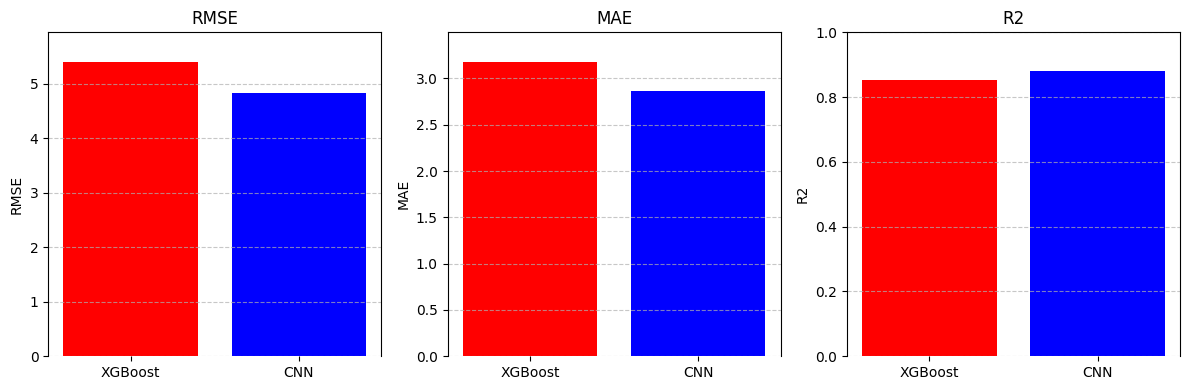

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Quick results table for each model ---
results = pd.DataFrame({
    "Model": ["XGBoost", "CNN"],   # models we want to compare
    "RMSE": [5.40, 4.83],          # root mean squared error
    "MAE": [3.180, 2.86],          # mean absolute error
    "R2":  [0.853, 0.881]          # R² score
})

# --- One row, three charts: RMSE, MAE, R² ---
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

metrics = ["RMSE", "MAE", "R2"]

# --- Loop through metrics and plot bars ---
for i, metric in enumerate(metrics):
    # Use fixed colors so we instantly know which bar is which model
    ax[i].bar(results["Model"], results[metric], color=["red", "blue"])

    ax[i].set_title(metric)      # title is just the metric name
    ax[i].set_ylabel(metric)     # y-axis label is also metric name

    #  y-axis; for R², it should never go above 1
    if metric != "R2":
        ax[i].set_ylim(0, max(results[metric]) * 1.1)
    else:
        ax[i].set_ylim(0, 1)
    ax[i].grid(axis="y", linestyle="--", alpha=0.7)
    ax[i].spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()


scatter plot comparisions

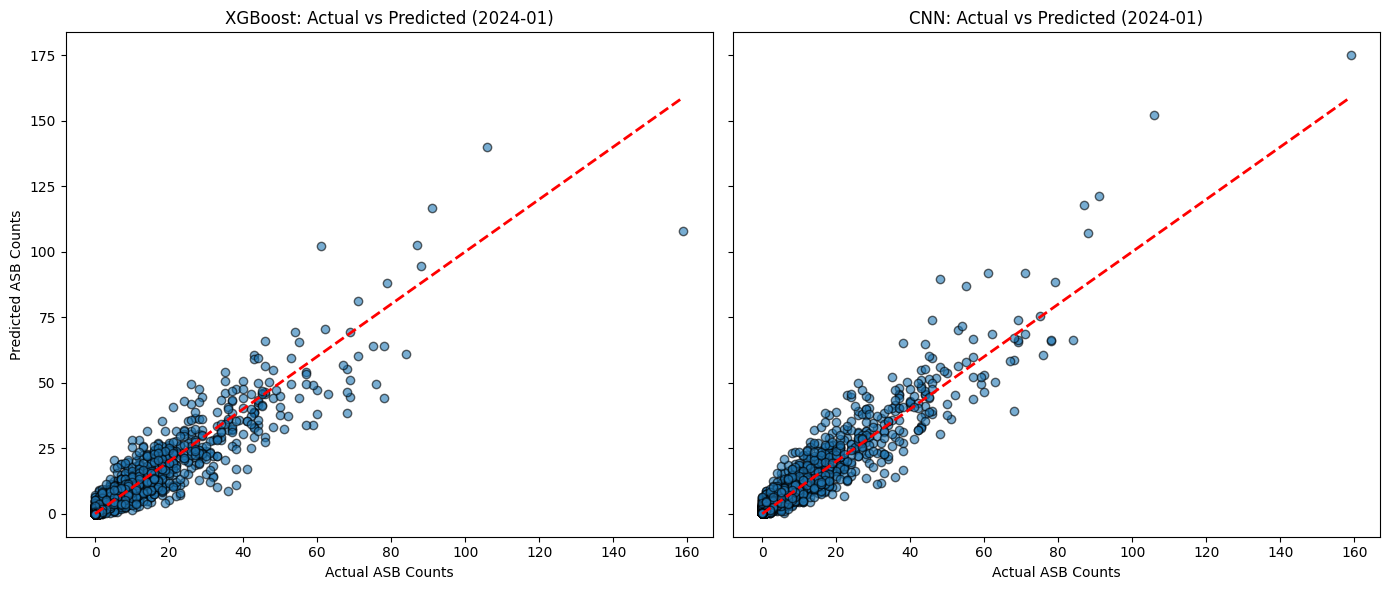

In [ ]:
import matplotlib.pyplot as plt

# --- Predictions for both models ---
# XGBoost
y_pred_xgb = xgb.predict(X_test_xgb)
y_pred_cnn = y_pred
y_true_cnn = y_test

# --- Two scatter plots side-by-side (share axes so scales match) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# XGBoost Scatter
axes[0].scatter(y_true, y_pred_xgb, alpha=0.6, edgecolor='k')  # dots for predictions
axes[0].plot(
    [y_true.min(), y_true.max()],
    [y_true.min(), y_true.max()],
    'r--', lw=2
)  # 1:1 reference line
axes[0].set_title("XGBoost: Actual vs Predicted (2024-01)")
axes[0].set_xlabel("Actual ASB Counts")
axes[0].set_ylabel("Predicted ASB Counts")

# CNN Scatter ---
axes[1].scatter(y_true_cnn, y_pred_cnn, alpha=0.6, edgecolor='k')
axes[1].plot(
    [y_true_cnn.min(), y_true_cnn.max()],
    [y_true_cnn.min(), y_true_cnn.max()],
    'r--', lw=2
)
axes[1].set_title("CNN: Actual vs Predicted (2024-01)")
axes[1].set_xlabel("Actual ASB Counts")

plt.tight_layout()
plt.show()


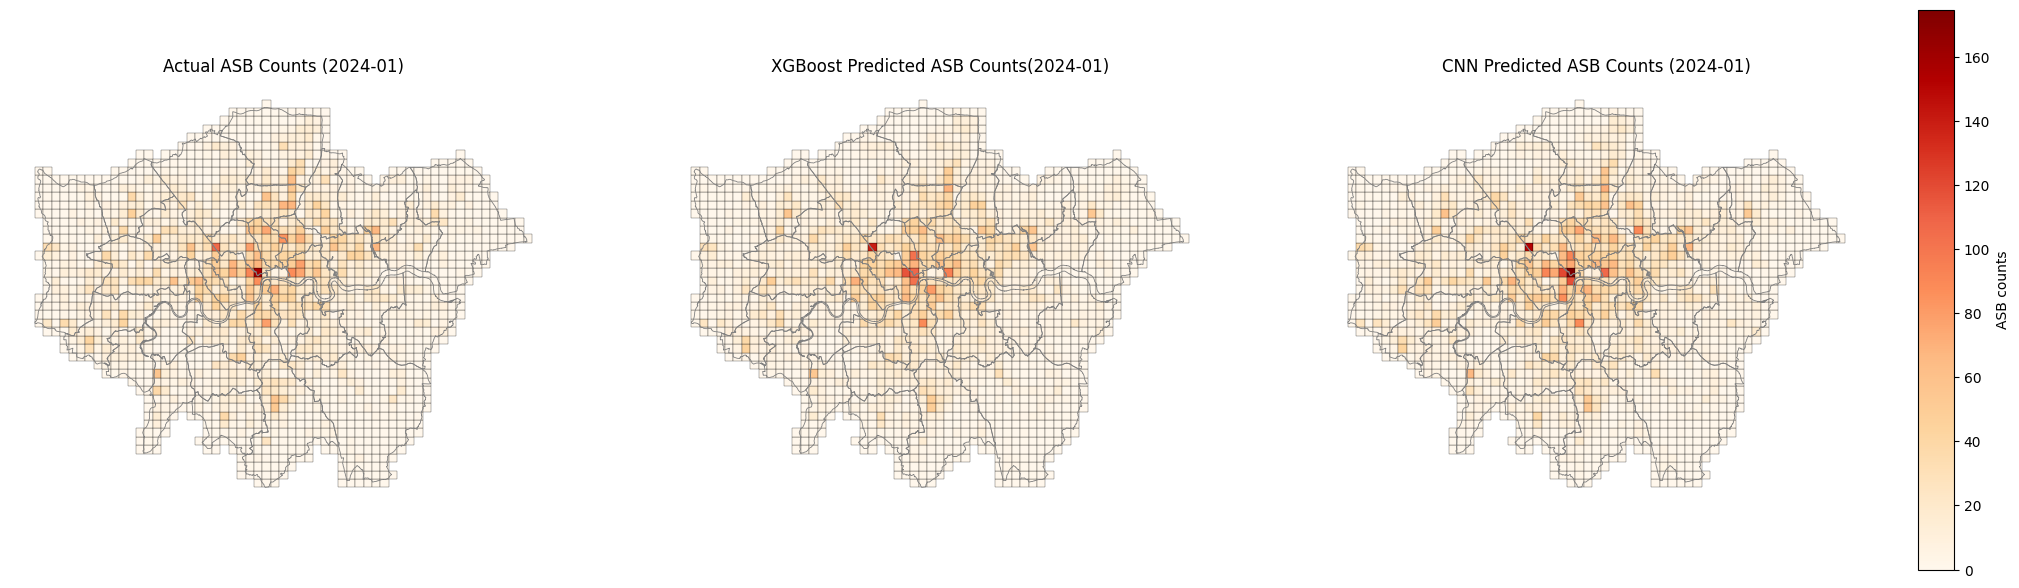

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#  Merging model predictions into a single gdf for plotting
gmap_all = gmap_xgb[['grid_id', 'geometry', 'y_true', 'y_pred_xgb']].merge(
    gmap[['grid_id', 'y_pred_cnn']], on='grid_id'
)
#same scalar range
vmin = gmap_all[['y_true', 'y_pred_xgb', 'y_pred_cnn']].min().min()
vmax = gmap_all[['y_true', 'y_pred_xgb', 'y_pred_cnn']].max().max()
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

#  1) Actual ASB Counts
gmap_all.plot(
    column='y_true', cmap='OrRd', linewidth=0.2, edgecolor='black',
    legend=False, vmin=vmin, vmax=vmax, ax=axes[0]
)
axes[0].set_title('Actual ASB Counts (2024-01)')
axes[0].axis('off')

#  2) XGBoost Predictions
gmap_all.plot(
    column='y_pred_xgb', cmap='OrRd', linewidth=0.2, edgecolor='black',
    legend=False, vmin=vmin, vmax=vmax, ax=axes[1]
)
axes[1].set_title('XGBoost Predicted ASB Counts(2024-01)')
axes[1].axis('off')

# 3) CNN Predictions
gmap_all.plot(
    column='y_pred_cnn', cmap='OrRd', linewidth=0.2, edgecolor='black',
    legend=False, vmin=vmin, vmax=vmax, ax=axes[2]
)
axes[2].set_title('CNN Predicted ASB Counts (2024-01)')
axes[2].axis('off')
try:
    for ax in axes:
        gdf_london.boundary.plot(ax=ax, color='gray', linewidth=0.6)
except Exception:
    pass  # no boundaries? skip gracefully

sm = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap='OrRd')
sm._A = []  # trick to make colorbar without calling .plot() again
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # manual position
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('ASB counts')

plt.show()


scatter plot comparisions(with the scores of r2,mae,rmse)

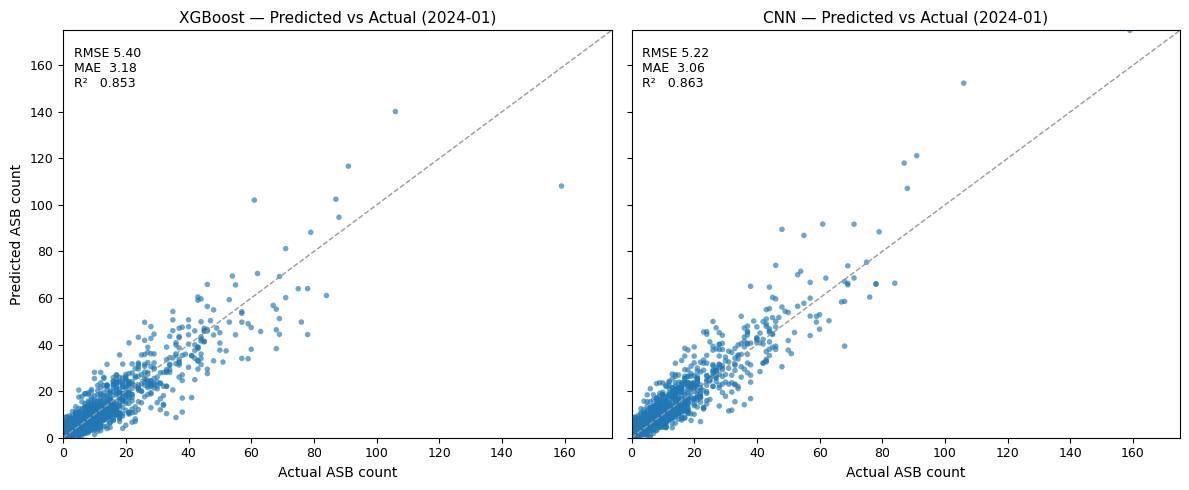

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_true = gmap_all['y_true'].to_numpy(dtype=float)
y_xgb  = gmap_all['y_pred_xgb'].to_numpy(dtype=float)
y_cnn  = gmap_all['y_pred_cnn'].to_numpy(dtype=float)

# Helper function to calculate RMSE, MAE, and R² all in one go
def metrics(y, yhat):
    return (
        np.sqrt(mean_squared_error(y, yhat)),  # RMSE
        mean_absolute_error(y, yhat),          # MAE
        r2_score(y, yhat),                     # R²
    )

# Compute metrics for both models so we can annotate plots
rmse_xgb, mae_xgb, r2_xgb = metrics(y_true, y_xgb)
rmse_cnn, mae_cnn, r2_cnn = metrics(y_true, y_cnn)

# Determine plot limits so both subplots use the same scale
lo = min(y_true.min(), y_xgb.min(), y_cnn.min())
hi = max(y_true.max(), y_xgb.max(), y_cnn.max())

# Set up two side-by-side scatter plots, sharing axes for direct comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Bundle title, predictions, and metrics for cleaner loop
pairs = [
    ("XGBoost — Predicted vs Actual (2024-01)", y_xgb, (rmse_xgb, mae_xgb, r2_xgb)),
    ("CNN — Predicted vs Actual (2024-01)",     y_cnn, (rmse_cnn, mae_cnn, r2_cnn)),
]

# Loop through each model and create scatter plots
for ax, (title, y_pred, (rmse, mae, r2)) in zip(axes, pairs):
    ax.scatter(y_true, y_pred, s=16, alpha=0.65, color='tab:blue', edgecolors='none')
    ax.plot([lo, hi], [lo, hi], '--', lw=1, color='0.6')  # 1:1 reference line
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("Actual ASB count")
    ax.set_xlim(lo, hi); ax.set_ylim(lo, hi)
    ax.tick_params(axis='both', labelsize=9)

    # Only the first subplot gets a y-axis label to avoid redundancy
    if ax is axes[0]:
        ax.set_ylabel("Predicted ASB count")

    # adding RMSE, MAE, and R² in the top-left of the plot
    ax.text(
        0.02, 0.96,
        f"RMSE {rmse:.2f}\nMAE  {mae:.2f}\nR²   {r2:.3f}",
        transform=ax.transAxes, va='top', ha='left', fontsize=9
    )
plt.tight_layout()
plt.show()


In [ ]:
gdf_london.columns

Index(['CTYUA24CD', 'CTYUA24NM', 'CTYUA24NMW', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry'],
      dtype='object')